In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:

"""!pip install yfinance
!pip install BeautifulSoup
!pip install requests"""


'!pip install yfinance\n!pip install BeautifulSoup\n!pip install requests'

In [2]:
import yfinance as yf
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


def download_stocks(ticker_list, start_date='2019-11-08', end_date='2023-11-08'):
    normalized_values_list = []
    stocks_kept = []
    kept_stocks_with_indexes = []

    for index, symbol in enumerate(ticker_list):
      try:
        # Download historical stock data using yfinance
        stock_data = yf.download(symbol, start=start_date, end=end_date)

        # Extract Open, High, Low, Close columns
        ohlc_values = stock_data[['Open', 'High', 'Low', 'Close']].values

        if len(ohlc_values) > 0:
            # Normalize the data between -1 and 1
            normalized_values = 2 * (ohlc_values - np.min(ohlc_values)) / np.ptp(ohlc_values) - 1

            # Keep only the first 1000 values if the length is greater than 1000
            if len(normalized_values) > 1000:
                normalized_values = normalized_values[:1000]

            normalized_values_list.append(normalized_values)
            stocks_kept.append(symbol)
            kept_stocks_with_indexes.append((index, symbol, normalized_values))
        else:
            # Remove the stock if it has not enough data
            print(f"Stock {symbol} has not enough data")
            continue
      except Exception as e:
        print(f"Error downloading data for {symbol}: {e}")
        continue



    # Get the different lengths of the stocks
    lengths = [len(stock[2]) for stock in kept_stocks_with_indexes]
    most_common_length = max(set(lengths), key=lengths.count)

    # Keep only the stocks with the most common length
    normalized_values_list = [stock[2] for stock in kept_stocks_with_indexes if len(stock[2]) == most_common_length]
    kept_stocks_with_indexes = [(index, symbol) for index, symbol, normalized_values in kept_stocks_with_indexes if len(normalized_values) == most_common_length]

    # Length is most_common_length, so no need to remove any values
    return normalized_values_list, kept_stocks_with_indexes

In [3]:

# request this url https://en.wikipedia.org/wiki/List_of_S%26P_600_companies
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_600_companies'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
# get the table by the id constituents
table = soup.find('table', {'id': 'constituents'})
ticker_list = []
# iterate over the tr balise in the table
for tr in table.find_all('tr'):
    # get the first td balise in the tr balise
    td = tr.findAll('td')
    # if the td balise is not empty
    if td is not None and len(td) > 1:
        # get the first a balise in the td balise

        a = td[0].find('a')
        # if the a balise is not empty
        if a is not None:
            # get the text of the a balise
            ticker = a.text
            # add the ticker to the list
            print(f"ticker : {ticker}")
            ticker_list.append(ticker)

ticker : AAON
ticker : AAP
ticker : AAT
ticker : ABCB
ticker : ABG
ticker : ABM
ticker : ABR
ticker : ACA
ticker : ACIW
ticker : ACLS
ticker : ADEA
ticker : ADTN
ticker : ADUS
ticker : AEIS
ticker : AEL
ticker : AEO
ticker : AGO
ticker : AGTI
ticker : AGYS
ticker : AHCO
ticker : AHH
ticker : AIN
ticker : AIR
ticker : AIT
ticker : AKR
ticker : ALEX
ticker : ALG
ticker : ALGT
ticker : ALK
ticker : ALKS
ticker : ALRM
ticker : AMBC
ticker : AMCX
ticker : AMEH
ticker : AMN
ticker : AMPH
ticker : AMR
ticker : AMSF
ticker : AMWD
ticker : ANDE
ticker : ANF
ticker : ANIP
ticker : AORT
ticker : AOSL
ticker : APAM
ticker : APLE
ticker : APOG
ticker : APPS
ticker : ARCB
ticker : ARI
ticker : ARLO
ticker : AROC
ticker : ARR
ticker : ASIX
ticker : ASO
ticker : ASTE
ticker : ATEN
ticker : ATGE
ticker : ATI
ticker : ATNI
ticker : AUB
ticker : AVA
ticker : AVAV
ticker : AVNS
ticker : AWI
ticker : AWR
ticker : AX
ticker : AXL
ticker : AZZ
ticker : B
ticker : BANC
ticker : BANF
ticker : BANR
ticker : BCC

In [4]:
import os
import pickle

percent_of_stocks_to_keep = 0.4
number_of_stocks_to_keep = int(len(ticker_list) * percent_of_stocks_to_keep)

ticker_list =  ticker_list[:number_of_stocks_to_keep]
# Check if the file exists
if os.path.exists('stocks_data.pkl'):
    # If the file exists, load it
    with open('stocks_data.pkl', 'rb') as f:
        stocks_data = pickle.load(f)
else:
    # If the file doesn't exist, download the stocks data
    # This is a placeholder for the code to download the stocks data
    # Replace it with the actual code to download the data
    stocks_data = download_stocks(ticker_list)

    # Save the downloaded data into a file
    with open('stocks_data.pkl', 'wb') as f:
        pickle.dump(stocks_data, f)

kept_stocks_with_indexes = stocks_data[1]
normalized_values_list = stocks_data[0]
print(f"kept_stocks_with_indexes : {kept_stocks_with_indexes}")

'''print(f"number_of_stocks_to_keep : {number_of_stocks_to_keep}")
kept_stocks_with_indexes = kept_stocks_with_indexes[:number_of_stocks_to_keep]
normalized_values_list = normalized_values_list[:number_of_stocks_to_keep]'''

kept_stocks_with_indexes : [(0, 'AAON'), (1, 'AAP'), (2, 'AAT'), (3, 'ABCB'), (4, 'ABG'), (5, 'ABM'), (6, 'ABR'), (7, 'ACA'), (8, 'ACIW'), (9, 'ACLS'), (10, 'ADEA'), (11, 'ADTN'), (12, 'ADUS'), (13, 'AEIS'), (14, 'AEL'), (15, 'AEO'), (16, 'AGO'), (18, 'AGYS'), (19, 'AHCO'), (20, 'AHH'), (21, 'AIN'), (22, 'AIR'), (23, 'AIT'), (24, 'AKR'), (25, 'ALEX'), (26, 'ALG'), (27, 'ALGT'), (28, 'ALK'), (29, 'ALKS'), (30, 'ALRM'), (31, 'AMBC'), (32, 'AMCX'), (33, 'AMEH'), (34, 'AMN'), (35, 'AMPH'), (37, 'AMSF'), (38, 'AMWD'), (39, 'ANDE'), (40, 'ANF'), (41, 'ANIP'), (42, 'AORT'), (43, 'AOSL'), (44, 'APAM'), (45, 'APLE'), (46, 'APOG'), (47, 'APPS'), (48, 'ARCB'), (49, 'ARI'), (50, 'ARLO'), (51, 'AROC'), (52, 'ARR'), (53, 'ASIX'), (55, 'ASTE'), (56, 'ATEN'), (57, 'ATGE'), (58, 'ATI'), (59, 'ATNI'), (60, 'AUB'), (61, 'AVA'), (62, 'AVAV'), (63, 'AVNS'), (64, 'AWI'), (65, 'AWR'), (66, 'AX'), (67, 'AXL'), (68, 'AZZ'), (69, 'B'), (70, 'BANC'), (71, 'BANF'), (72, 'BANR'), (73, 'BCC'), (74, 'BCPC'), (75, 'B

'print(f"number_of_stocks_to_keep : {number_of_stocks_to_keep}")\nkept_stocks_with_indexes = kept_stocks_with_indexes[:number_of_stocks_to_keep]\nnormalized_values_list = normalized_values_list[:number_of_stocks_to_keep]'

(226, 1000, 4)
donnees x shape : (800, 226, 200, 4)
donnees y shape : (800, 226, 4)
180
(800, 180, 200, 4)
(800, 46, 200, 4)
donnees shape : (226, 1000, 4)
donnes_train shape : (180, 1000, 4)
donnes_test shape : (46, 1000, 4)
train_x : (800, 180, 200, 4)
train_y : (800, 180, 4)
test_x : (800, 46, 200, 4)
test_y : (800, 46, 4)


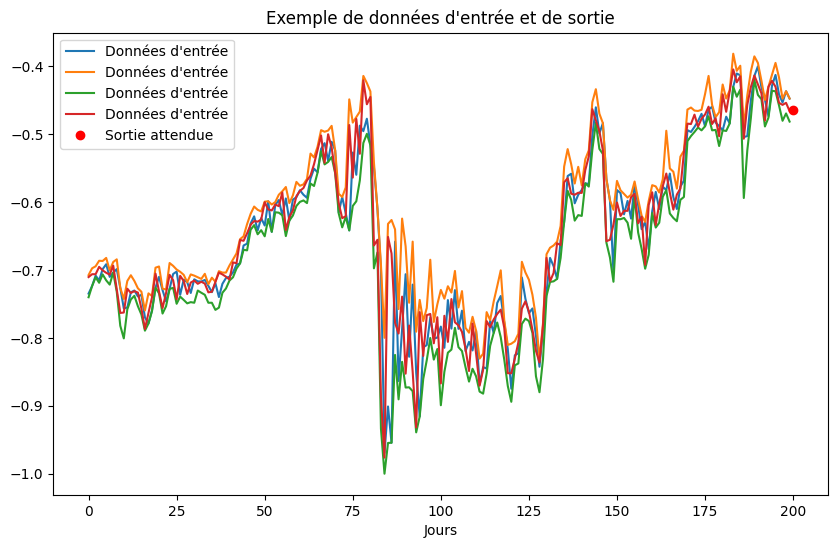

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Créer un jeu de données fictif pour démonstration

donnees = np.array(normalized_values_list)
print(donnees.shape)
# Fonction pour préparer le dataset
def preparer_dataset(data, longueur_sequence):
    sequences_x = []
    sequences_y = []

    for i in range(len(data[0]) - longueur_sequence):
        sequence_x = data[:, i:i+longueur_sequence]
        sequence_y = data[:, i+longueur_sequence]
        sequences_x.append(sequence_x)
        sequences_y.append(sequence_y)

    return np.array(sequences_x), np.array(sequences_y)

# Définir la longueur de la séquence pour l'entrée du réseau de neurones
longueur_sequence = 200

# Préparer le dataset avec la fonction définie
donnees_x, donnees_y = preparer_dataset(donnees, longueur_sequence)
print(f"donnees x shape : {donnees_x.shape}")
print(f"donnees y shape : {donnees_y.shape}")
stocks_train = int(0.8 * (donnees_x.shape[1]))

train_x, test_x = np.split(donnees_x, [stocks_train], axis=1)

train_y, test_y = np.split(donnees_y, [stocks_train], axis=1)

# Diviser les données en ensembles d'entraînement et de test
print(stocks_train)
print(train_x.shape)
print(test_x.shape)

donnes_train = donnees[:][:stocks_train]
donnes_test = donnees[:][stocks_train:]
print(f"donnees shape : {donnees.shape}")
print(f"donnes_train shape : {donnes_train.shape}")
print(f"donnes_test shape : {donnes_test.shape}")

# Plot des données d'entrée et de sortie
indice_stock = 0  # Indice du stock à visualiser
print(f"train_x : {train_x.shape}")
print(f"train_y : {train_y.shape}")
print(f"test_x : {test_x.shape}")
print(f"test_y : {test_y.shape}")
plt.figure(figsize=(10, 6))
plt.plot(range(longueur_sequence), train_x[0][indice_stock], label='Données d\'entrée')
plt.plot(longueur_sequence, train_y[0][indice_stock][0], 'ro', label='Sortie attendue')
plt.title('Exemple de données d\'entrée et de sortie')
plt.xlabel('Jours')
plt.legend()
plt.show()


In [6]:

import torch
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, data_x, data_y):
        self.data_x = torch.tensor(data_x, dtype=torch.float32)
        self.data_y = torch.tensor(data_y, dtype=torch.float32)

    def __len__(self):
        return len(self.data_x)

    def __getitem__(self, idx):

        return self.data_x[idx], self.data_y[idx]

# Convertir les données en dataset PyTorch
print(f"train_x : {train_x.shape}")
print(f"train_y : {test_x.shape}")
# flatten the two first dimensions
train_x_non_reshaped = train_x
train_y_non_reshaped = train_y
test_x_non_reshaped = test_x
test_y_non_reshaped = test_y
print(f"train_y 2  : {train_y.shape}")

train_x = train_x.reshape((train_x.shape[0]*train_x.shape[1],train_x.shape[2],train_x.shape[3]))
train_y = train_y.reshape(train_y.shape[0]*train_y.shape[1],train_y.shape[2])
test_x = test_x.reshape((test_x.shape[0]*test_x.shape[1],test_x.shape[2],test_x.shape[3]))
test_y = test_y.reshape(test_y.shape[0]*test_y.shape[1],test_y.shape[2])
print(f"train_x : {train_x.shape}")
print(f"train_y : {train_y.shape}")
print(f"test_x : {test_x.shape}")
print(f"test_y : {test_y.shape}")
train_dataset = StockDataset(train_x, train_y)
test_dataset = StockDataset(test_x, test_y)

# Créer des DataLoadersà
batch_size = 64
train_loader_predict = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader_predict = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


train_x : (800, 180, 200, 4)
train_y : (800, 46, 200, 4)
train_y 2  : (800, 180, 4)
train_x : (144000, 200, 4)
train_y : (144000, 4)
test_x : (36800, 200, 4)
test_y : (36800, 4)


In [7]:
for input,output in train_loader_predict:
    # Process each batch
    print("Batch shape:", input.shape, output.shape)  # Adjust this according to your processing needs
    # Your processing logic here
    break

Batch shape: torch.Size([64, 200, 4]) torch.Size([64, 4])


In [8]:
class StockDatasetReconstruct(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
# Create sub-series for each stock with OHLC values
sub_series_length = 200  # Define your sub-series length
stock_symbols = [stock[1] for stock in kept_stocks_with_indexes]
[print(data.shape) for data in normalized_values_list]
sub_series_list = [np.stack(normalized_values, axis=1).reshape((-1, 4, sub_series_length)).transpose(0, 2, 1) for normalized_values in normalized_values_list]

# Convert the list to a numpy array
stocks_np_array = np.zeros((len(stock_symbols), sub_series_list[0].shape[0], sub_series_list[0].shape[1], sub_series_list[0].shape[2]))
for i in range(len(stock_symbols)):
    stocks_np_array[i] = sub_series_list[i]
print(stocks_np_array.shape)
# Assuming stocks_np_array is your data
stock_dataset = StockDatasetReconstruct(stocks_np_array)

# Split the dataset into train and test sets
train_size = int(0.7 * len(stock_dataset))
test_size = len(stock_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(stock_dataset, [train_size, test_size])
# Create DataLoader for train and test datasets
train_loader_reconstruction = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_reconstruction = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Iterate through the DataLoader to get shuffled batches
for batch in train_loader_reconstruction:
    # Process each batch
    print("Batch shape:", batch.shape)  # Adjust this according to your processing needs
    number_of_sub_series = batch.shape[1]
    # Your processing logic here

(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)


In [9]:
"""# plot the first stock in the train set
plt.figure(figsize=(10, 6))
plt.plot(X_train[0].cpu().detach().numpy(), label='Original signal')
plt.plot(y_train[0:100].cpu().detach().numpy(), label='Reconstructed signal')

plt.legend()
plt.show()
"""
print(number_of_sub_series)

5


(200, 4)


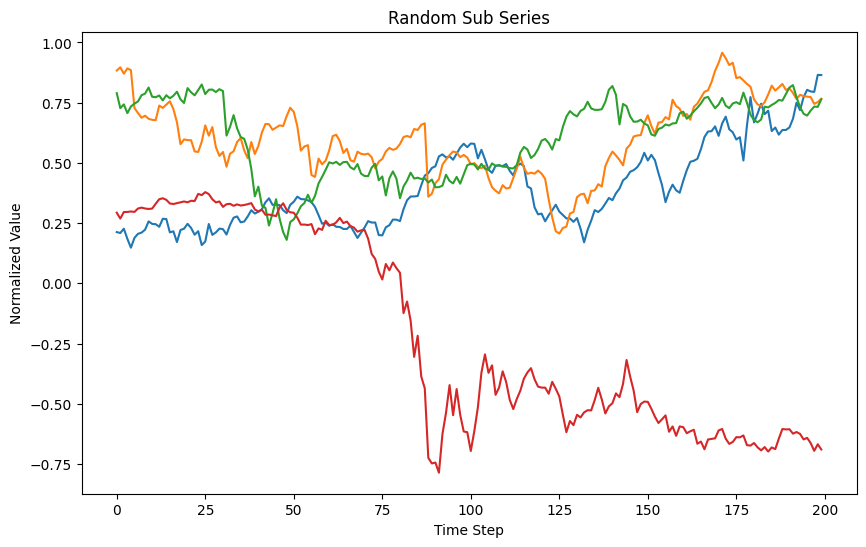

In [10]:
# print a random sub series

number_of_stocks = len(stock_symbols)
random_index_stocks = np.random.randint(0, number_of_stocks)
random_index_sub_series = np.random.randint(0, number_of_sub_series)
plt.figure(figsize=(10, 6))
print(stocks_np_array[random_index_stocks][random_index_sub_series].shape)
plt.plot(stocks_np_array[random_index_stocks][random_index_sub_series])
plt.title('Random Sub Series')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.show()


In [45]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
class SamplingLayerVAE(nn.Module):
  def __init__(self):
    super(SamplingLayerVAE, self).__init__()

  def forward(self, mu, log_var):
    std = torch.exp(0.5 * log_var)
    eps = torch.randn_like(std)
    return mu + eps * std

class Encoder(nn.Module):
  def __init__(self, seq_len, n_features, embedding_dim=64,num_layers=3,bidirectional=False,
               transfromer_hidden_size_attention = 128,num_heads=8,sub_seq_len=20,
               latent_dim=64):
    super(Encoder, self).__init__()
    assert seq_len % sub_seq_len  == 0
    self.number_of_sub_seq = seq_len // sub_seq_len
    self.sub_seq_len = sub_seq_len
    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim
    self.num_layers = num_layers
    self.bidirectional = bidirectional
    self.chunk_index_embedding = ChunkIndexEmbedding(num_chunks=self.seq_len,embedding_dim=embedding_dim)

    self.mu = nn.Linear((self.sub_seq_len//2)*self.embedding_dim,latent_dim)
    self.log_var = nn.Linear((self.sub_seq_len//2)*self.embedding_dim, latent_dim)
    self.sampling_layer = SamplingLayerVAE()
    self.rnn1 = nn.LSTM(
          input_size=embedding_dim,
          hidden_size=embedding_dim,
          num_layers=self.num_layers,
          batch_first=True,
            bidirectional=self.bidirectional
        )


    multiple_bi = 2 if bidirectional else 1


    #self.positional_encoding = PositionalEncoding(embedding_dim)
    self.embedding_layer = nn.Linear(n_features, embedding_dim)
    print(f"numver sub swq {self.number_of_sub_seq}")
    self.transformer_1 = CompressWithAttentionResidual(input_size=self.hidden_dim,output_size=embedding_dim,
                                             hidden_size_attention=embedding_dim*2,
                                             group_size=self.number_of_sub_seq)

    self.transformer_2 = CompressWithAttentionResidual(input_size=embedding_dim,output_size=embedding_dim,
                                             hidden_size_attention=embedding_dim,
                                             group_size=2)


  def forward(self, x):
    batch_size, seq_len, n_features = x.size()
    original_x = x

    #x = x.reshape((batch_size * seq_len, n_features))
    x = self.embedding_layer(x)
    x = F.relu(x)
    x = self.chunk_index_embedding(x)
    x = F.relu(x)
    x, (_, _) = self.rnn1(x)


    x = self.transformer_1(x)
    x = self.transformer_2(x)
    x = x.reshape((batch_size, (self.sub_seq_len//2)*self.embedding_dim))
    mu = self.mu(x)
    log_var = self.log_var(x)
    z = self.sampling_layer(mu, log_var)

    return z, mu, log_var, original_x



class Decoder(nn.Module):
  def __init__(self, seq_len, input_dim=64, n_features=1,num_layers=3,bidirectional=False,
               sub_seq_len=20,latent_dim=64):
    super(Decoder, self).__init__()
    assert seq_len % sub_seq_len  == 0
    self.number_of_sub_seq = seq_len // sub_seq_len
    # number
    self.sub_seq_len = sub_seq_len
    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features
    self.num_layers = num_layers
    self.bidirectional = bidirectional
    self.expend_layer_1 = ExpandWithAttentionResidual(input_size=latent_dim,output_size=input_dim,
                                             hidden_size_attention=latent_dim,
                                             group_size=self.sub_seq_len ,expansion_factor=
                                                    self.number_of_sub_seq)

    self.expend_layer_2 = ExpandWithAttentionResidual(input_size=input_dim,output_size=input_dim,
                                             hidden_size_attention=input_dim,
                                             group_size=self.sub_seq_len*self.number_of_sub_seq,expansion_factor=2)

    self.output_embeding = OutputEmbedding(input_dim=self.hidden_dim,seq_len=self.seq_len,output_dim=n_features)
    self.chunk_index_embedding = ChunkIndexEmbedding(num_chunks=self.seq_len,embedding_dim=input_dim)
    self.rnn1 = nn.LSTM(
          input_size=input_dim,
          hidden_size=input_dim,
          num_layers=self.num_layers,
          batch_first=True,
            bidirectional=self.bidirectional
        )

    multiple_bi = 2 if bidirectional else 1

  def forward(self, x):

    batch_size = x.size(0)
    # x is shape (batch_size, 1, n_features)
    # repeat the last dimension to have (batch_size, seq_len, n_features)
    x = x.unsqueeze(1)
    x = x.repeat(1, self.sub_seq_len//2, 1)

    x = self.expend_layer_1(x)
    x = F.relu(x)
    x = self.chunk_index_embedding(x)
    x = F.relu(x)
    x = self.expend_layer_2(x)
    x = F.relu(x)
    x, (hidden_n, cell_n) = self.rnn1(x)
    x = x.reshape((batch_size,self.seq_len, self.hidden_dim))
    x = self.output_embeding(x)

    # keep only the last layer


    return x
class ExpandWithAttentionResidual(nn.Module):
    def __init__(self, input_size, output_size, hidden_size_attention, group_size, expansion_factor):
        super(ExpandWithAttentionResidual, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size_attention
        self.group_size = group_size
        self.expansion_factor = expansion_factor

        # Linear projections for attention
        self.Q_linear = nn.Linear(self.input_size, self.expansion_factor * self.hidden_size)
        self.K_linear = nn.Linear(self.input_size, self.expansion_factor * self.hidden_size)
        self.V_linear = nn.Linear(self.input_size, self.expansion_factor * self.hidden_size)

        # Final linear transformations
        self.attention_output_linear = nn.Linear(self.expansion_factor * self.hidden_size,  self.expansion_factor * self.hidden_size)
        self.output_linear = nn.Linear(self.hidden_size , self.output_size)
        self.norma = nn.LayerNorm(self.hidden_size)
    def forward(self, x):
        # x is shape (batch_size, seq_len, n_features)
        batch_size, seq_len, n_features = x.size()
        # Use attention to expand the input

        x = x.view(batch_size* seq_len , n_features)
        Q = self.Q_linear(x)
        K = self.K_linear(x)
        V = self.V_linear(x)
        Q = Q.reshape((batch_size, seq_len, self.expansion_factor * self.hidden_size))
        K = K.reshape((batch_size, seq_len, self.expansion_factor * self.hidden_size))
        V = V.reshape((batch_size, seq_len, self.expansion_factor * self.hidden_size))
        # Compute attention weights
        attention_weights = torch.matmul(Q, K.transpose(-2, -1)) / (self.hidden_size ** 0.5)
        attention_weights = F.softmax(attention_weights, dim=-1)

        # Apply attention weights to values
        attended_values = torch.matmul(attention_weights, V)

        # Apply final linear transformations
        attended_values = attended_values.reshape((batch_size* seq_len , self.expansion_factor * self.hidden_size))
        attention_output = self.attention_output_linear(attended_values)

        # Reshape attention output into groups of size self.group_size
        attention_output = attention_output.view(batch_size, seq_len* self.expansion_factor ,self.hidden_size)

        # Add residual connection
        # repeat the tensor x to have the same shape as attention_output
        # repeat to have from (batch_size, seq_len, n_features) to (batch_size, seq_len* self.expansion_factor ,n_features)
        x = x.view(batch_size, seq_len, n_features)
        x = x.repeat(1, self.expansion_factor, 1)
        out = attention_output + x
        batch_size, expended_seq_len, n_features = out.size()
        # normalize the output
        out = out.reshape((batch_size* expended_seq_len , n_features))
        #out = self.norma(out)

        # Final linear transformation
        out = self.output_linear(out)

        # RElu
        out = F.relu(out)
        out = out.reshape((batch_size, expended_seq_len, self.output_size))
        return out

class CompressWithAttentionResidual(nn.Module):
    def __init__(self, input_size, output_size, hidden_size_attention, group_size):
        super(CompressWithAttentionResidual, self).__init__()
        self.input_size = input_size
        print(f"ouput size : {output_size}")
        self.output_size = output_size
        self.hidden_size = hidden_size_attention
        self.group_size = group_size

        # Linear projections for attention
        self.Q_linear = nn.Linear(self.input_size, self.hidden_size)
        self.K_linear = nn.Linear(self.input_size, self.hidden_size)
        self.V_linear = nn.Linear(self.input_size, self.hidden_size)

        # Final linear transformations
        self.attention_output_linear = nn.Linear(self.hidden_size, self.hidden_size)
        self.output_linear = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, x):
        # x is shape (batch_size, seq_len, n_features)
        batch_size, seq_len, n_features = x.size()
        # Reshape input into groups of size self.group_size

        x = x.view(batch_size, -1, self.group_size, n_features)
        group_len = x.size(1)

        # Linear projections for attention

        Q = self.Q_linear(x)
        K = self.K_linear(x)
        V = self.V_linear(x)

        # Compute attention weights
        attention_weights = torch.matmul(Q, K.transpose(-2, -1)) / (self.hidden_size ** 0.5)
        attention_weights = F.softmax(attention_weights, dim=-1)

        # Apply attention weights to values
        attended_values = torch.matmul(attention_weights, V)

        # Sum along the group dimension
        attended_values = attended_values.sum(dim=2)

        # Apply final linear transformations
        attention_output = self.attention_output_linear(attended_values)


        # Add residual connection
        # so, we need to pack the tensor x to have the same shape as attention_output. We have to do : x[i] = x[i] + x[i+1] and so on paired by 2
        group_size = self.group_size
# Create slices and sum them based on the group size
        slices = [x[:, i::group_size, :] for i in range(group_size)]

        x = sum(slices)
        # Final linear transformation

        batch_size_2, sub_series_length, n_features = attention_output.size()


        x = x.reshape((batch_size_2 , sub_series_length, n_features))
        out = attention_output + x

        # Final linear transformation
        out = self.output_linear(out)

        # RElu
        out = F.relu(out)
        return out


class ChunkIndexEmbedding(nn.Module):
    def __init__(self,num_chunks=100,embedding_dim=64):
        super(ChunkIndexEmbedding, self).__init__()
        self.num_chunks = num_chunks
        self.embedding = nn.Embedding(self.num_chunks,embedding_dim )

    def forward(self, x):
        batch_size, seq_len, n_features = x.size()
        chunk_index = torch.arange(0, seq_len, 1).to(x.device)

        chunk_index = chunk_index.unsqueeze(0).repeat(batch_size, 1)

        chunk_index = self.embedding(chunk_index)

        x = x + chunk_index
        return x

class InputEmbedding(nn.Module):
    def __init__(self,seq_len, input_dim=1,output_dim=64):
        super(InputEmbedding, self).__init__()

        self.seq_len = seq_len
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.embedding = nn.Linear(self.input_dim, self.output_dim)
    def forward(self, x):
        batch_size, seq_len, n_features = x.size()
        x = x.reshape((batch_size * seq_len, n_features))
        x = self.embedding(x)
        x = x.reshape((batch_size, seq_len, self.output_dim))
        return x

class OutputEmbedding(nn.Module):
    def __init__(self,seq_len, input_dim=64,output_dim=1):
        super(OutputEmbedding, self).__init__()

        self.seq_len = seq_len
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.embedding = nn.Linear(self.input_dim, self.output_dim)
    def forward(self, x):
        batch_size, seq_len, n_features = x.size()
        x = x.reshape((batch_size * seq_len, n_features))
        x = self.embedding(x)
        x = x.reshape((batch_size, seq_len, self.output_dim))
        return x




In [46]:
class SimpleEncoderLSTM(nn.Module):
  def __init__(self, seq_len, n_features, embedding_dim=64,num_layers=3,bidirectional=False,latent_dim=64):
    super(SimpleEncoderLSTM, self).__init__()
    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim
    print(f"hidden_dim: {self.hidden_dim}")
    self.num_layers = num_layers
    self.bidirectional = bidirectional
    self.chunk_index_embedding = ChunkIndexEmbedding(num_chunks=self.seq_len,embedding_dim=embedding_dim)
    self.embedding_layer = nn.Linear(n_features, embedding_dim)

    self.rnn1 = nn.LSTM(
          input_size=embedding_dim,
          hidden_size=self.hidden_dim,
          num_layers=self.num_layers,
          batch_first=True,
            bidirectional=self.bidirectional
        )


    multiple_bi = 2 if bidirectional else 1

    self.rnn2 = nn.LSTM(
          input_size=multiple_bi * self.hidden_dim,
          hidden_size=embedding_dim,
          num_layers=self.num_layers,
          batch_first=True
    )

    self.mu = torch.nn.Linear(self.seq_len * embedding_dim, latent_dim)
    self.log_var = torch.nn.Linear(self.seq_len * embedding_dim, latent_dim)
    self.sampling_layer = SamplingLayerVAE()



  def forward(self, x):
    original_x = x
    batch_size, seq_len, n_features = x.size()
    #x = x.reshape((batch_size * seq_len, n_features))
    x = self.embedding_layer(x)
    x = nn.ReLU()(x)
    x = self.chunk_index_embedding(x)
    x = nn.ReLU()(x)
    x, (_, _) = self.rnn1(x)
    x, (hidden_n, _) = self.rnn2(x)
    x = x.reshape((batch_size, self.seq_len * self.embedding_dim))
    mu = self.mu(x)
    log_var = self.log_var(x)
    z = self.sampling_layer(mu, log_var)

    return z, mu, log_var,  original_x

class SimpleDecoderLSTM(nn.Module):
  def __init__(self, seq_len, input_dim=64, n_features=1,num_layers=3,bidirectional=False):
    super(SimpleDecoderLSTM, self).__init__()
    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features
    self.num_layers = num_layers
    self.bidirectional = bidirectional
    self.rnn1 = nn.LSTM(
          input_size=input_dim,
          hidden_size=input_dim,
          num_layers=self.num_layers,
          batch_first=True,
            bidirectional=self.bidirectional
        )

    multiple_bi = 2 if bidirectional else 1
    self.rnn2 = nn.LSTM(
      input_size=input_dim * multiple_bi,
      hidden_size=self.hidden_dim,
      num_layers=self.num_layers,
      batch_first=True
    )
    self.output_layer = nn.Linear(self.hidden_dim, n_features)

  def forward(self, x):


    batch_size = x.size(0)
    # x is shape (batch_size,  n_features)
    # repeat the last dimension to have (batch_size, seq_len, n_features)
    x = x.unsqueeze(1)
    x = x.repeat(1, self.seq_len, 1)

    x, (hidden_n, cell_n) = self.rnn1(x)
    x, (hidden_n, cell_n) = self.rnn2(x)
    x = x.reshape((batch_size,self.seq_len, self.hidden_dim))
    # keep only the last layer


    return self.output_layer(x)


In [47]:
class PredictNextDayHead(nn.Module):
    def __init__(self,latent_dim,hidden_dim=64):
        super(PredictNextDayHead, self).__init__()
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.linear_1 = nn.Linear(self.latent_dim,self.hidden_dim)
        self.linear_2 = nn.Linear(self.hidden_dim,1)

    def forward(self,x):
        x = self.linear_1(x)
        x = nn.ReLU()(x)
        x = self.linear_2(x)
        x = nn.Tanh()(x)
        return x


In [48]:
import torch.nn as nn

class PredictNextDayHeadLSTM(nn.Module):
    def __init__(self, latent_dim, hidden_dim=64):
        super(PredictNextDayHeadLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.lstm = nn.LSTM(input_size=self.latent_dim,
                            hidden_size=self.hidden_dim,
                            batch_first=True,
                            bidirectional=True)  # Bidirectional LSTM

        # No need for linear layers as LSTM already handles the sequence and hidden states
        # Tanh activation will be applied after LSTM
        self.output = nn.Linear(self.hidden_dim*2,1)
    def forward(self, x):
        # LSTM input: (batch_size, seq_len, input_size)
        # Output: output, (h_n, c_n)
        # output: (batch_size, seq_len, num_directions * hidden_size)
        # h_n: (num_layers * num_directions, batch, hidden_size)
        # c_n: (num_layers * num_directions, batch, hidden_size)
        output, _ = self.lstm(x)
        output = output[:,-1,:]
        output = self.output(output)
        # Applying Tanh activation function
        output = nn.Tanh()(output)

        return output


In [49]:
class RecurrentAutoencoder_LSTM(nn.Module):
  def __init__(self, seq_len, n_features, embedding_dim=64,latent_dim=2):
    super(RecurrentAutoencoder_LSTM, self).__init__()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.encoder = SimpleEncoderLSTM(seq_len, n_features, embedding_dim,bidirectional=True,num_layers=1,latent_dim=latent_dim).to(device)
    self.decoder = SimpleDecoderLSTM(seq_len, latent_dim, n_features,bidirectional=True,num_layers=1).to(device)
  def forward(self, x):
    z, mu, log_var,  original_x = self.encoder(x)

    x = self.decoder(z)
    x = nn.Tanh()(x)
    return x, original_x, mu, log_var

  def predict_next_day(self,x):
        z, mu, log_var, original_x = self.encoder(x)
        x = self.decoder(z)
        return x


In [50]:
latent_dim = 128
sub_series_length = 200
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_LSTM = RecurrentAutoencoder_LSTM(sub_series_length, 4, 64,latent_dim=latent_dim).to(device)
print(f"model : {model_LSTM}")

hidden_dim: 128
model : RecurrentAutoencoder_LSTM(
  (encoder): SimpleEncoderLSTM(
    (chunk_index_embedding): ChunkIndexEmbedding(
      (embedding): Embedding(200, 64)
    )
    (embedding_layer): Linear(in_features=4, out_features=64, bias=True)
    (rnn1): LSTM(64, 128, batch_first=True, bidirectional=True)
    (rnn2): LSTM(256, 64, batch_first=True)
    (mu): Linear(in_features=12800, out_features=128, bias=True)
    (log_var): Linear(in_features=12800, out_features=128, bias=True)
    (sampling_layer): SamplingLayerVAE()
  )
  (decoder): SimpleDecoderLSTM(
    (rnn1): LSTM(128, 128, batch_first=True, bidirectional=True)
    (rnn2): LSTM(256, 256, batch_first=True)
    (output_layer): Linear(in_features=256, out_features=4, bias=True)
  )
)


In [51]:
class RecurrentAutoencoder(nn.Module):
  def __init__(self, seq_len, n_features, embedding_dim=128,sub_seq_len=10,latent_dim=2):
    super(RecurrentAutoencoder, self).__init__()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.encoder = Encoder(seq_len, n_features, embedding_dim,bidirectional=True,num_layers=1,
        sub_seq_len=sub_seq_len,latent_dim=latent_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features,bidirectional=True,num_layers=1,
        sub_seq_len=sub_seq_len,latent_dim=latent_dim).to(device)

    self.predict_next_day_head = PredictNextDayHeadLSTM(latent_dim=1,hidden_dim=128).to(device)
  def forward(self, x):
    z, mu, sigma, original_x = self.encoder(x)
    x = self.decoder(z)
    x = nn.Tanh()(x)
    return x, original_x, mu, sigma

  def predict_next_day(self,x):
    z, mu, sigma, original_x = self.encoder(x)
    x = self.predict_next_day_head(z)
    return x

In [52]:
print(f"sub_series_length : {sub_series_length}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim = 128
model_attention = RecurrentAutoencoder(sub_series_length, 4, 128,sub_seq_len=200,latent_dim=latent_dim).to(device)


sub_series_length : 200
numver sub swq 1
ouput size : 128
ouput size : 128


In [53]:
class Discriminator(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64,num_layers=1,  bidirectional=False,
               transfromer_hidden_size_attention = 128,num_heads=8,sub_seq_len=20,
               latent_dim=64):
        super(Discriminator, self).__init__()




        assert seq_len % sub_seq_len  == 0
        self.number_of_sub_seq = seq_len // sub_seq_len
        self.sub_seq_len = sub_seq_len
        self.seq_len, self.n_features = seq_len, n_features
        self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.chunk_index_embedding = ChunkIndexEmbedding(num_chunks=self.seq_len,embedding_dim=embedding_dim)

        self.rnn1 = nn.LSTM(
              input_size=embedding_dim,
              hidden_size=embedding_dim,
              num_layers=self.num_layers,
              batch_first=True,
                bidirectional=self.bidirectional
            )


        multiple_bi = 2 if bidirectional else 1


        #self.positional_encoding = PositionalEncoding(embedding_dim)
        self.embedding_layer = nn.Linear(n_features, embedding_dim)
        print(f"numver sub swq {self.number_of_sub_seq}")
        self.transformer_1 = CompressWithAttentionResidual(input_size=self.hidden_dim,output_size=embedding_dim,
                                                 hidden_size_attention=embedding_dim*2,
                                                 group_size=self.number_of_sub_seq)

        self.transformer_2 = CompressWithAttentionResidual(input_size=embedding_dim,output_size=embedding_dim,
                                                 hidden_size_attention=embedding_dim,
                                                 group_size=2)

        self.linear_1 = nn.Linear((self.sub_seq_len//2)*self.embedding_dim,1)

    def forward(self, x):
        batch_size, seq_len, n_features = x.size()
        original_x = x

        #x = x.reshape((batch_size * seq_len, n_features))
        x = self.embedding_layer(x)
        x = F.relu(x)
        x = self.chunk_index_embedding(x)
        x = F.relu(x)
        x, (_, _) = self.rnn1(x)
        print(f"x shape : {x.shape}")

        x = self.transformer_1(x)
        x = self.transformer_2(x)
        x = x.reshape((batch_size, (self.sub_seq_len//2)*self.embedding_dim))

        x = self.linear_1(x)
        x = nn.Sigmoid()(x)

        return x

In [54]:
discriminator = Discriminator(sub_series_length, 4, 128,sub_seq_len=200,latent_dim=latent_dim,bidirectional=True).to(device)


numver sub swq 1
ouput size : 128
ouput size : 128


In [55]:
trainable_param_LSTM = sum(p.numel() for p in model_LSTM.parameters())
print(f"trainable_param_LSTM : {trainable_param_LSTM}")
trainable_param_attention = sum(p.numel() for p in model_attention.parameters())
print(f"trainable_param_attention : {trainable_param_attention}")
trainable_param_discriminator = sum(p.numel() for p in discriminator.parameters())
print(f"trainable_param_discriminator : {trainable_param_discriminator}")


trainable_param_LSTM : 4362820
trainable_param_attention : 4635781
trainable_param_discriminator : 681857


In [57]:
# test discriminator
x = torch.randn((64,200,4)).to(device)
print(f"x shape : {x.shape}")
y = discriminator(x)
print(f"y shape : {y.shape}")
print(f"y : {y}")

x shape : torch.Size([64, 200, 4])
x shape : torch.Size([64, 200, 256])
y shape : torch.Size([64, 1])
y : tensor([[0.5069],
        [0.5063],
        [0.5041],
        [0.5082],
        [0.5058],
        [0.5071],
        [0.5087],
        [0.5067],
        [0.5053],
        [0.5088],
        [0.5065],
        [0.5089],
        [0.5062],
        [0.5092],
        [0.5054],
        [0.5089],
        [0.5094],
        [0.5103],
        [0.5064],
        [0.5087],
        [0.5073],
        [0.5102],
        [0.5053],
        [0.5077],
        [0.5059],
        [0.5090],
        [0.5084],
        [0.5072],
        [0.5071],
        [0.5084],
        [0.5090],
        [0.5069],
        [0.5064],
        [0.5068],
        [0.5062],
        [0.5075],
        [0.5103],
        [0.5069],
        [0.5078],
        [0.5094],
        [0.5074],
        [0.5062],
        [0.5067],
        [0.5073],
        [0.5080],
        [0.5078],
        [0.5060],
        [0.5062],
        [0.5057],
        [0.5

In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm  # Importer tqdm pour la barre de progression

# Définir loss_fn, optimizer, epoch, model_attention, train_loader ici...

device = torch.device("cpu")
model_attention.to(device)
loss_fn = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model_attention.predict_next_day_head.parameters(), lr=2e-5)

epochs = 1000

for epoch in range(epochs):
    epoch_loss = 0
    with tqdm(train_loader_predict, unit="batch") as tepoch:
        tepoch.set_description(f"Epoch {epoch}")
        for i, (input, target) in enumerate(tepoch):
            # Process each batch
            # plot the first stock in the train set

            # Adjust this according to your processing needs
            batch = input.to(device)
            batch = batch.to(torch.float32)

            # Your processing logic here
            optimizer.zero_grad()
            z, _, _, _ = model_attention.encoder(batch)

            z = z.unsqueeze(-1)

            x = model_attention.predict_next_day_head(z)
            print(f"target shape : {target.shape}")
            target = target.to(device)



            loss = loss_fn(x, target)
            #loss =  np.mean((1 / ( input_first.cpu().detach().numpy() - x.cpu().detach().numpy() )))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            tepoch.set_postfix(loss=loss.item())  # Afficher la perte pour chaque batch
            tepoch.update()

    # Afficher la perte moyenne pour chaque epoch
    mean_epoch_loss = epoch_loss / len(train_loader.dataset)
    print(f'Epoch: {epoch}, Mean Loss: {mean_epoch_loss}')


Epoch 0:   0%|          | 0/100 [00:00<?, ?batch/s]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 4])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 0:   1%|          | 1/100 [00:01<02:06,  1.27s/batch, loss=70]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


Epoch 0:   3%|▎         | 3/100 [00:02<01:12,  1.34batch/s, loss=58]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


Epoch 0:   5%|▌         | 5/100 [00:03<00:59,  1.60batch/s, loss=68.2]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


Epoch 0:   6%|▌         | 6/100 [00:04<01:09,  1.36batch/s, loss=48.9]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


Epoch 0:   8%|▊         | 8/100 [00:05<00:58,  1.58batch/s, loss=42.7]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


Epoch 0:   9%|▉         | 9/100 [00:06<01:04,  1.41batch/s, loss=54.8]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


Epoch 0:  10%|█         | 10/100 [00:07<01:10,  1.28batch/s, loss=61.8]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


Epoch 0:  12%|█▏        | 12/100 [00:08<00:57,  1.53batch/s, loss=53.6]

x shape : torch.Size([64, 200, 4])
target shape : torch.Size([64, 4])


Epoch 0:   8%|▊         | 8/100 [00:09<01:47,  1.17s/batch, loss=53.6] 


KeyboardInterrupt: ignored

donnees train shape : (92, 1000, 4)
donnees test shape : (23, 1000, 4)
z shape : torch.Size([800, 256, 1])
prediction shape : torch.Size([800, 1])
z shape : torch.Size([800, 256, 1])
prediction shape : torch.Size([800, 1])
(800, 4)


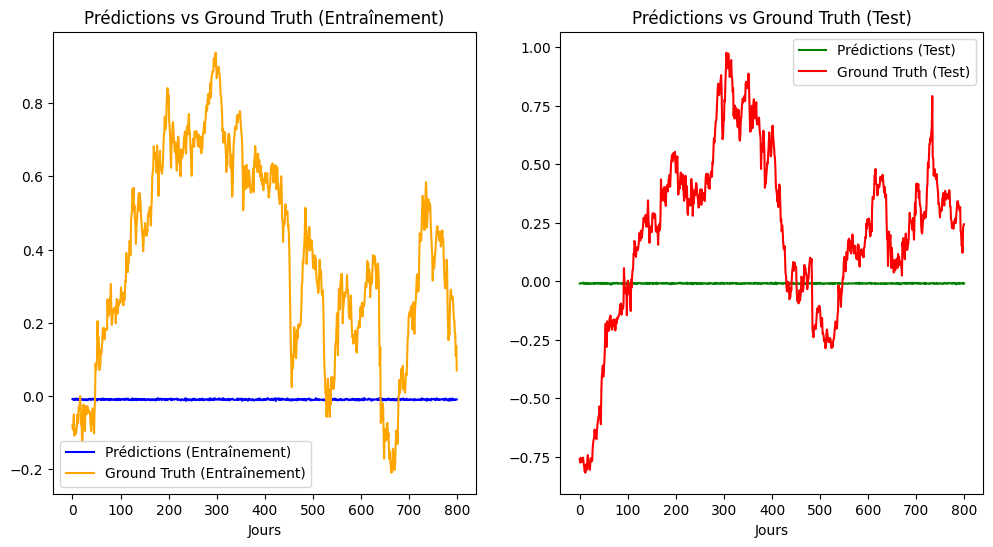

In [95]:

def preparer_donnees_prediction(stock_index, data):
    sequences_x = []
    sequences_y = []
    for i in range(len(data[0]) - longueur_sequence):
        sequence_x = data[stock_index, i:i+longueur_sequence]
        sequence_y = data[stock_index, i+longueur_sequence]
        sequences_x.append(sequence_x)
        sequences_y.append(sequence_y)

    return np.array(sequences_x), np.array(sequences_y)

print(f'donnees train shape : {donnes_train.shape}')
print(f'donnees test shape : {donnes_test.shape}')


def predire_stock(model, stock_index, data):
    data_x, data_y = preparer_donnees_prediction(stock_index, data)

    # plot the first stock in the train set

    with torch.no_grad():

        data_x_tensor = torch.tensor(data_x, dtype=torch.float32,device="cuda")

        model = model.to(torch.device("cuda"))
        z, _, _, _ = model_attention.encoder(data_x_tensor)
        z = z.unsqueeze(-1)
        print(f"z shape : {z.shape}")
        predictions = model_attention.predict_next_day_head(z)
        print(f"prediction shape : {predictions.shape}")
    return predictions.cpu().numpy(), data_y
# Utilisation de la fonction predire_stock pour obtenir les prédictions et les sorties attendues pour un stock spécifique dans l'ensemble d'entraînement
indice_stock_a_predire_train = 6
predictions_stock_train, sorties_attendues_train = predire_stock(model_attention, indice_stock_a_predire_train, donnes_train)

# Utilisation de la fonction predire_stock pour obtenir les prédictions et les sorties attendues pour un stock spécifique dans l'ensemble de test
indice_stock_a_predire_test = 0 # Choisir un indice approprié du jeu de test
predictions_stock_test, sorties_attendues_test = predire_stock(model_attention, indice_stock_a_predire_test,donnes_test)

# Plot des prédictions et des sorties attendues pour les ensembles d'entraînement et de test côte à côte
plt.figure(figsize=(12, 6))
print(sorties_attendues_train.shape)
plt.subplot(1, 2, 1)  # Première colonne du subplot pour les données d'entraînement
plt.plot(predictions_stock_train[:,0], label='Prédictions (Entraînement)', color='blue')
plt.plot(sorties_attendues_train[:,0], label='Ground Truth (Entraînement)', color='orange')
plt.title('Prédictions vs Ground Truth (Entraînement)')
plt.xlabel('Jours')
plt.legend()

plt.subplot(1, 2, 2)  # Deuxième colonne du subplot pour les données de test
plt.plot(predictions_stock_test[:,0], label='Prédictions (Test)', color='green')
plt.plot(sorties_attendues_test[:,0], label='Ground Truth (Test)', color='red')
plt.title('Prédictions vs Ground Truth (Test)')
plt.xlabel('Jours')
plt.legend()
plt.show()



In [96]:
# take random values from

In [60]:
def KL_loss(mu, sigma):
    return -0.5 * torch.sum(1 + sigma - mu.pow(2) - sigma.exp())

def reconstruction_loss(x, y):

    return nn.MSELoss(reduction='sum')(x,y)



def loss_function(x, original_x, mu, sigma,k1=1,k2=1e-5):
    prior_loss = KL_loss(mu, sigma)
    reconstruction_loss_ = reconstruction_loss(x, original_x)

    return k1 * reconstruction_loss_ + k2 * prior_loss   , reconstruction_loss_, prior_loss


In [61]:
# Convert the numpy array to a PyTorch tensor
# The shape is : (number_of_stocks, number_of_sub_series, sub_series_length, features)
# We need to reshape it to (number_of_stocks * number_of_sub_series, sub_series_length, features)
number_of_stocks = stocks_np_array.shape[0]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

stocks_np_array_test = stocks_np_array.reshape((number_of_stocks*number_of_sub_series, sub_series_length, 4))
signal_to_tensor = torch.from_numpy(stocks_np_array_test).float().to(device)
print(f"signal_to_tensor shape : {stocks_np_array_test.shape}")
# Forward pass through the model
#x, original_x, mu, sigma = model_LSTM(signal_to_tensor)

# Reconstruct the good output shape
#x = x.reshape((number_of_stocks, number_of_sub_series, sub_series_length, 1))


signal_to_tensor shape : (1130, 200, 4)


In [62]:
# load from cuda to cpu
#model = torch.load("model.pth",map_location=torch.device('cpu'))

random stocks : [224 211 110  46  62]
random sub series : [4 3 4 0 2]


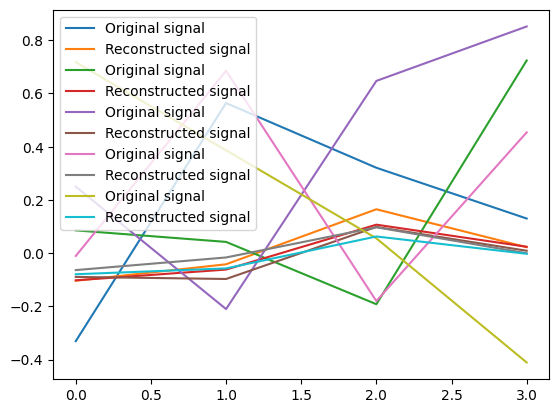

In [63]:
# Plot the reconstruction
# Plot 10 random stocks
number_of_stocks_to_plot = 5
random_stocks = np.random.randint(0, number_of_stocks, number_of_stocks_to_plot)
print(f"random stocks : {random_stocks}")
# Plot 10 random sub-series
random_sub_series = np.random.randint(0, number_of_sub_series, number_of_stocks_to_plot)
print(f"random sub series : {random_sub_series}")
# Plot the original and reconstructed signals
for i in range(number_of_stocks_to_plot):
    plt.plot(original_x[random_stocks[i]][random_sub_series[i]].cpu().detach().numpy(), label='Original signal')
    plt.plot(x[random_stocks[i]][random_sub_series[i]].cpu().detach().numpy(), label='Reconstructed signal')
plt.legend()
plt.show()



In [65]:
# try a simple overfitting
# add tensorboard to visualize the loss
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

optimizer_encoder = torch.optim.Adam(model_attention.encoder.parameters(), lr=3e-4
                             )
optimizer_decoder = torch.optim.Adam(model_attention.decoder.parameters(), lr=3e-4
                             )
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=3e-4)
batch_size = 128
shuffle = True  # To shuffle the data
loss_list_KL_attention = []
loss_list_reconstruction_attention = []
loss_list_attention = []
#loss_fn = nn.L1Loss(reduction='sum')
iterator = 0
for epoch in range(2000):
    epoch_loss_KL = 0
    epoch_loss_reconstruction = 0
    epoch_loss = 0
    for batch in train_loader_reconstruction:
        # Process each batch
        batch = batch.to(device)
        batch = batch.to(torch.float32)
        batch_size_current = batch.shape[0]
        number_of_sub_series = batch.shape[1]

        batch = batch.reshape((batch_size_current*number_of_sub_series, sub_series_length, 4))
        # Your processing logic here
        optimizer.zero_grad()
        x, original_x, mu, sigma = model_attention(batch)
        total_loss,reconstruction_l,KL_l = loss_function(x, original_x, mu, sigma)
        discriminator_real = discriminator(original_x)
        discriminator_fake = discriminator(x)
        discriminator_loss = torch.log(discriminator_real) + torch.log(1 - discriminator_fake)
        discriminator_loss = torch.mean(discriminator_loss)

        encoder_loss = total_loss

        decoder_loss = reconstruction_l - discriminator_loss
        gan_loss = discriminator_loss
        optimizer_encoder.zero_grad()
        optimizer_decoder.zero_grad()
        discriminator_optimizer.zero_grad()


        encoder_loss.backward(retain_graph=True)
        decoder_loss.backward(retain_graph=True)
        gan_loss.backward()


        optimizer_encoder.step()
        optimizer_decoder.step()
        discriminator_optimizer.step()

        epoch_loss_KL += KL_l.item()
        epoch_loss_reconstruction += reconstruction_l.item()
        epoch_loss += total_loss.item()
        # write all loss in tensorboard
        writer.add_scalar('Loss/train', total_loss.item(), iterator)
        writer.add_scalar('Loss/train_KL', KL_l.item(), iterator)
        writer.add_scalar('Loss/train_reconstruction', reconstruction_l.item(), iterator)
        writer.add_scalar('Loss/train_discriminator', discriminator_loss.item(), iterator)
        writer.add_scalar('Loss/train_encoder', encoder_loss.item(), iterator)
        writer.add_scalar('Loss/train_decoder', decoder_loss.item(), iterator)
        writer.add_scalar('Loss/train_gan', gan_loss.item(), iterator)
        iterator += 1
    loss_list_KL_attention.append(epoch_loss_KL)
    loss_list_reconstruction_attention.append(epoch_loss_reconstruction)
    loss_list_attention.append(epoch_loss)
    if epoch % 2 == 0:
        print(f'Epoch: {epoch}, loss: {total_loss.item()}')
# plot the loss, KL and reconstruction in 3 different color on the same plot
# normalize loss between 0 and 1
"""loss_list_attention = np.array(loss_list_attention)
loss_list_attention = (loss_list_attention - np.min(loss_list_attention)) / (np.max(loss_list_attention) - np.min(loss_list_attention))
loss_list_KL_attention = np.array(loss_list_KL_attention)
loss_list_KL_attention = (loss_list_KL_attention - np.min(loss_list_KL_attention)) / (np.max(loss_list_KL_attention) - np.min(loss_list_KL_attention))
loss_list_reconstruction_attention = np.array(loss_list_reconstruction_attention)
loss_list_reconstruction_attention = (loss_list_reconstruction_attention - np.min(loss_list_reconstruction_attention)) / (np.max(loss_list_reconstruction_attention) - np.min(loss_list_reconstruction_attention))
"""
plt.figure(figsize=(20, 5))
plt.plot(loss_list_attention, label='Total loss')
plt.plot(loss_list_KL_attention, label='KL loss')
plt.plot(loss_list_reconstruction_attention, label='Reconstruction loss')
plt.legend()
plt.show()


x shape : torch.Size([320, 200, 256])
x shape : torch.Size([320, 200, 256])
x shape : torch.Size([320, 200, 256])
x shape : torch.Size([320, 200, 256])
x shape : torch.Size([150, 200, 256])
x shape : torch.Size([150, 200, 256])
Epoch: 0, loss: 27600.291015625
x shape : torch.Size([320, 200, 256])
x shape : torch.Size([320, 200, 256])


KeyboardInterrupt: 

In [43]:
# try a simple overfitting
optimizer = torch.optim.Adam(model_LSTM.parameters(), lr=1e-3)
batch_size = 32
shuffle = True  # To shuffle the data
data_loader = DataLoader(stocks_np_array, batch_size=batch_size, shuffle=shuffle)
loss_list_KL_LSTM = []
loss_list_reconstruction_lSTM = []
loss_list_LSTM = []
#loss_fn = nn.L1Loss(reduction='sum')

for epoch in range(1000):
    epoch_loss_KL = 0
    epoch_loss_reconstruction = 0
    epoch_loss = 0
    for batch in data_loader:
        # Process each batch
        #print("Batch shape:", batch.shape)  # Adjust this according to your processing needs
        batch = batch.to(device)
        batch = batch.to(torch.float32)
        batch_size_current = batch.shape[0]
        batch = batch.reshape((batch_size_current*number_of_sub_series, sub_series_length, 4))
        # Your processing logic here
        optimizer.zero_grad()
        x, original_x, mu, sigma = model_LSTM(batch)
        total_loss,reconstruction_l,KL_l = loss_function(x, original_x, mu, sigma)
        total_loss.backward()
        optimizer.step()
        epoch_loss_KL += KL_l.item()
        epoch_loss_reconstruction += reconstruction_l.item()
        epoch_loss += total_loss.item()
    loss_list_KL_LSTM.append(epoch_loss_KL)
    loss_list_reconstruction_lSTM.append(epoch_loss_reconstruction)
    loss_list_LSTM.append(epoch_loss)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, loss: {total_loss.item()}')
# plot the loss, KL and reconstruction in 3 different color on the same plot
# normalize loss between 0 and 1
"""loss_list_LSTM = np.array(loss_list_LSTM)
loss_list_LSTM = (loss_list_LSTM - np.min(loss_list_LSTM)) / (np.max(loss_list_LSTM) - np.min(loss_list_LSTM))
loss_list_KL_LSTM = np.array(loss_list_KL_LSTM)
loss_list_KL_LSTM = (loss_list_KL_LSTM - np.min(loss_list_KL_LSTM)) / (np.max(loss_list_KL_LSTM) - np.min(loss_list_KL_LSTM))
loss_list_reconstruction_LSTM = np.array(loss_list_reconstruction_lSTM)
loss_list_reconstruction_LSTM = (loss_list_reconstruction_LSTM - np.min(loss_list_reconstruction_LSTM)) / (np.max(loss_list_reconstruction_LSTM) - np.min(loss_list_reconstruction_LSTM))"""
plt.figure(figsize=(20, 5))
plt.plot(loss_list_LSTM, label='Total loss')
plt.plot(loss_list_KL_LSTM, label='KL loss')
plt.plot(loss_list_reconstruction_lSTM, label='Reconstruction loss')
plt.legend()
plt.show()


Epoch: 0, loss: 16239.65234375


KeyboardInterrupt: ignored

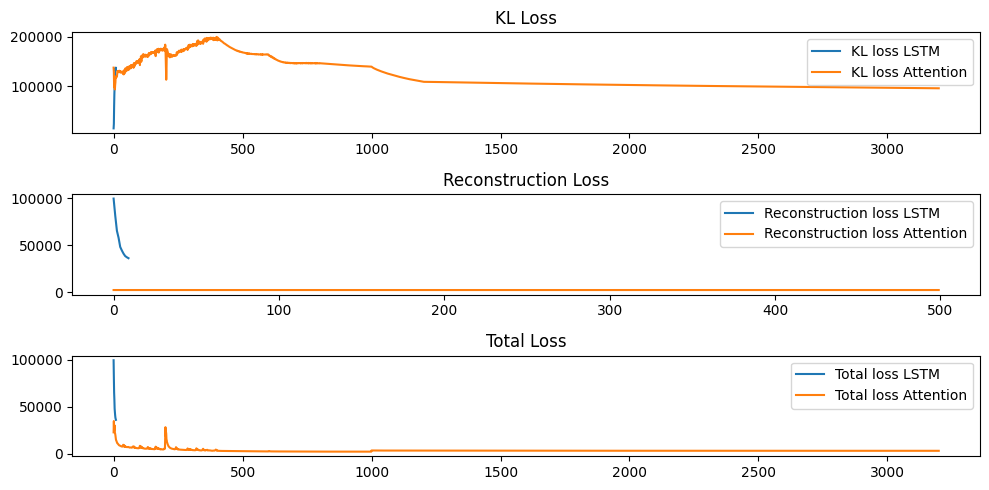

In [50]:
import matplotlib.pyplot as plt
"""loss_list_LSTM = np.array(loss_list_LSTM)
loss_list_LSTM = (loss_list_LSTM - np.min(loss_list_LSTM)) / (np.max(loss_list_LSTM) - np.min(loss_list_LSTM))
loss_list_KL_LSTM = np.array(loss_list_KL_LSTM)
loss_list_KL_LSTM = (loss_list_KL_LSTM - np.min(loss_list_KL_LSTM)) / (np.max(loss_list_KL_LSTM) - np.min(loss_list_KL_LSTM))
loss_list_reconstruction_LSTM = np.array(loss_list_reconstruction_lSTM)
loss_list_reconstruction_LSTM = (loss_list_reconstruction_LSTM - np.min(loss_list_reconstruction_LSTM)) / (np.max(loss_list_reconstruction_LSTM) - np.min(loss_list_reconstruction_LSTM))
"""# Assuming you have lists of losses: loss_list_KL_LSTM, loss_list_KL_attention,
# loss_list_reconstruction_lSTM, loss_list_reconstruction_attention, loss_list_LSTM, loss_list_attention

# Plotting on three separate subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

# Subplot 1: KL loss
axs[0].plot(loss_list_KL_LSTM, label='KL loss LSTM')
axs[0].plot(loss_list_KL_attention, label='KL loss Attention')
axs[0].set_title('KL Loss')
axs[0].legend()

# Subplot 2: Reconstruction loss
axs[1].plot(loss_list_reconstruction_lSTM[-500:], label='Reconstruction loss LSTM')
axs[1].plot(loss_list_reconstruction_attention[-500:], label='Reconstruction loss Attention')
axs[1].set_title('Reconstruction Loss')
axs[1].legend()
# Subplot 3: Total loss
axs[2].plot(loss_list_LSTM, label='Total loss LSTM')
axs[2].plot(loss_list_attention, label='Total loss Attention')
axs[2].set_title('Total Loss')
axs[2].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


x shape : torch.Size([575, 200, 4])
number_of_stocks : 115
number_of_sub_series : 5
sub_series_length : 200
stocks_np_array_reshaped shape : (115, 5, 200, 4)


<Figure size 1500x1000 with 0 Axes>

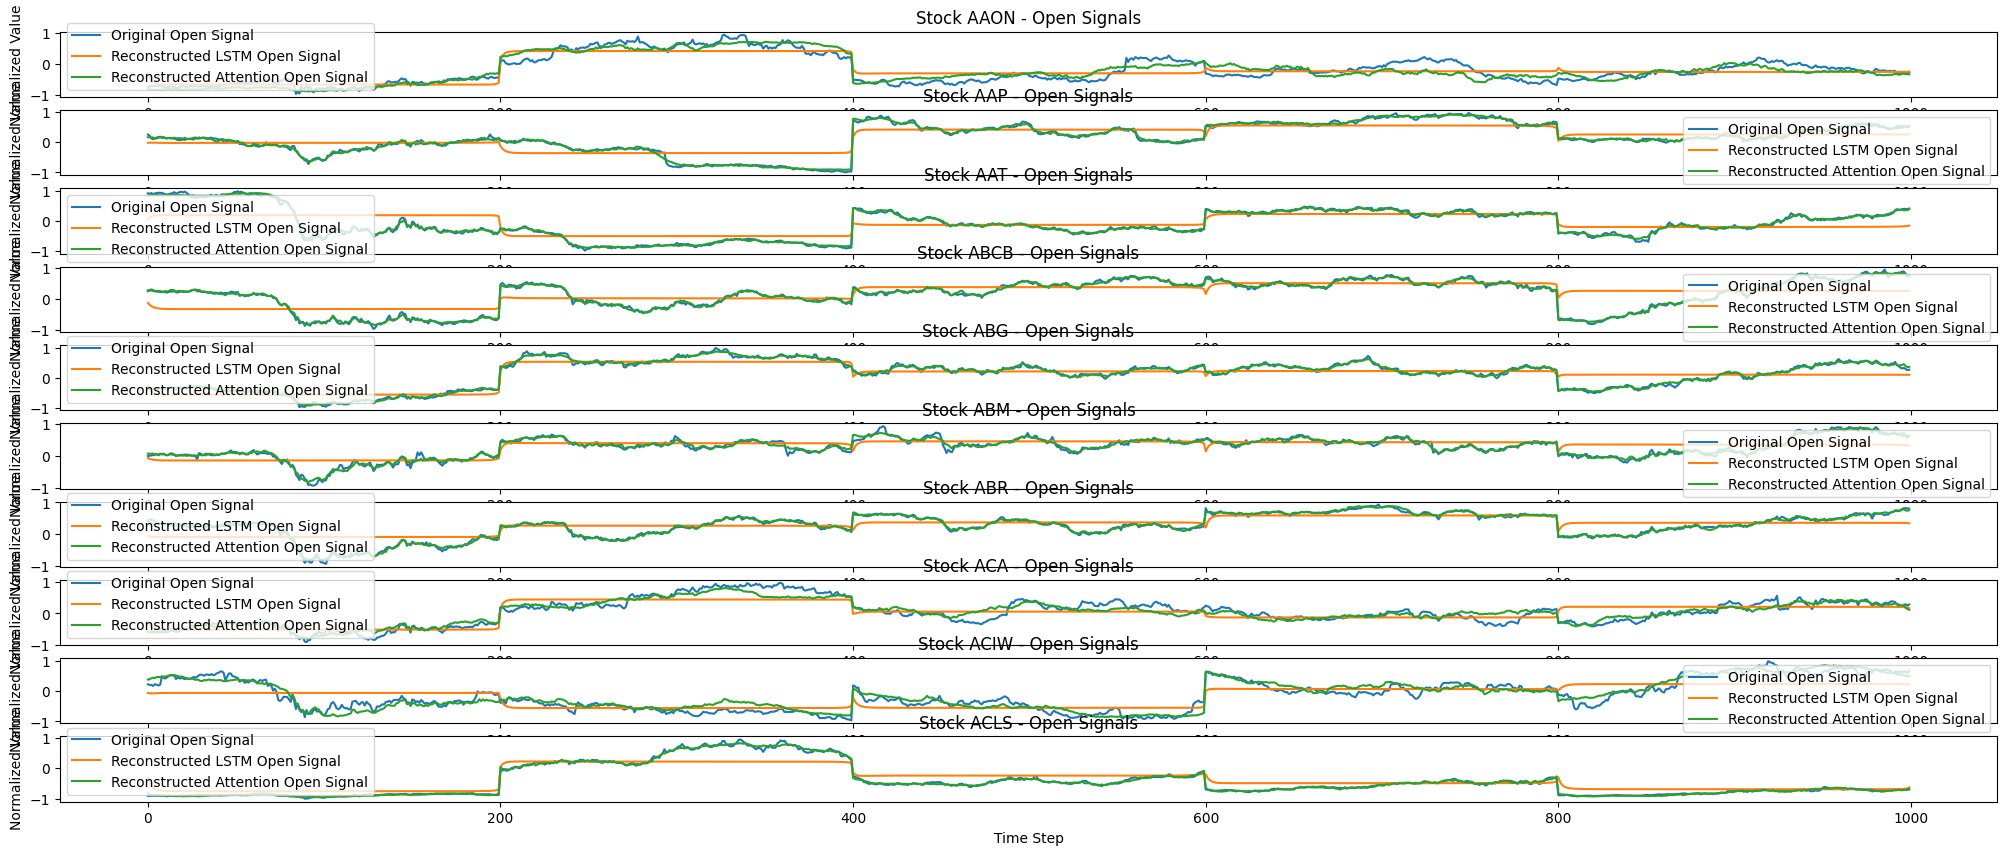

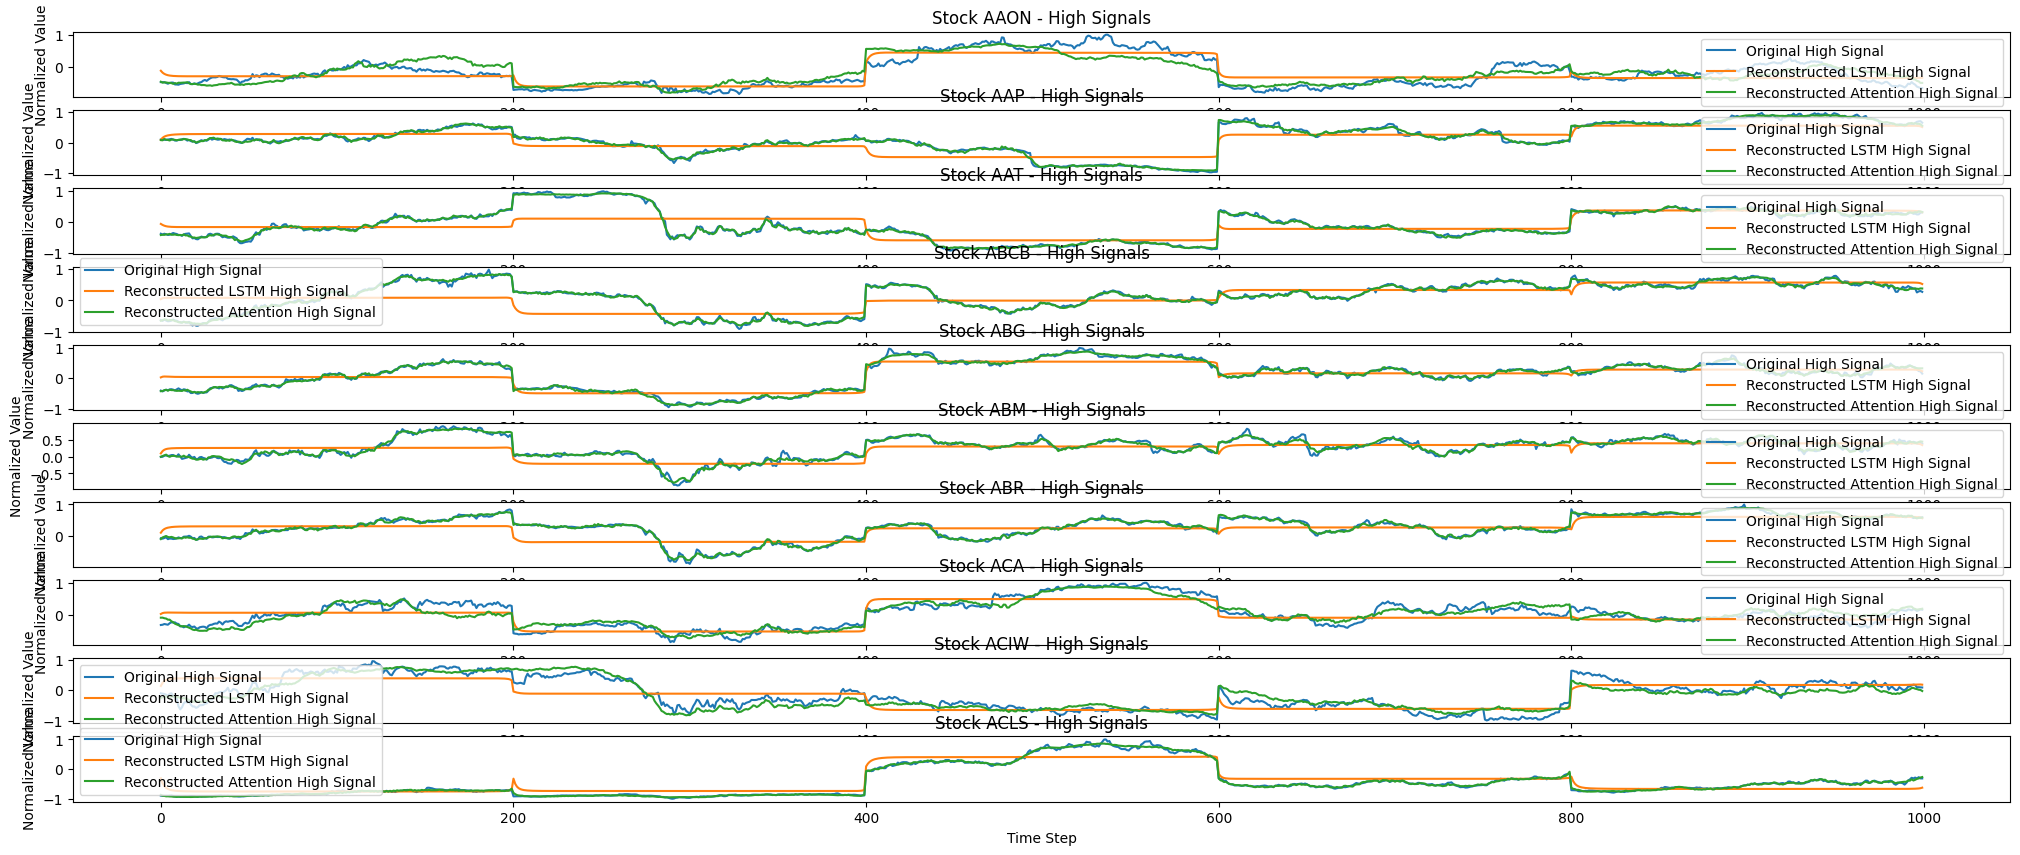

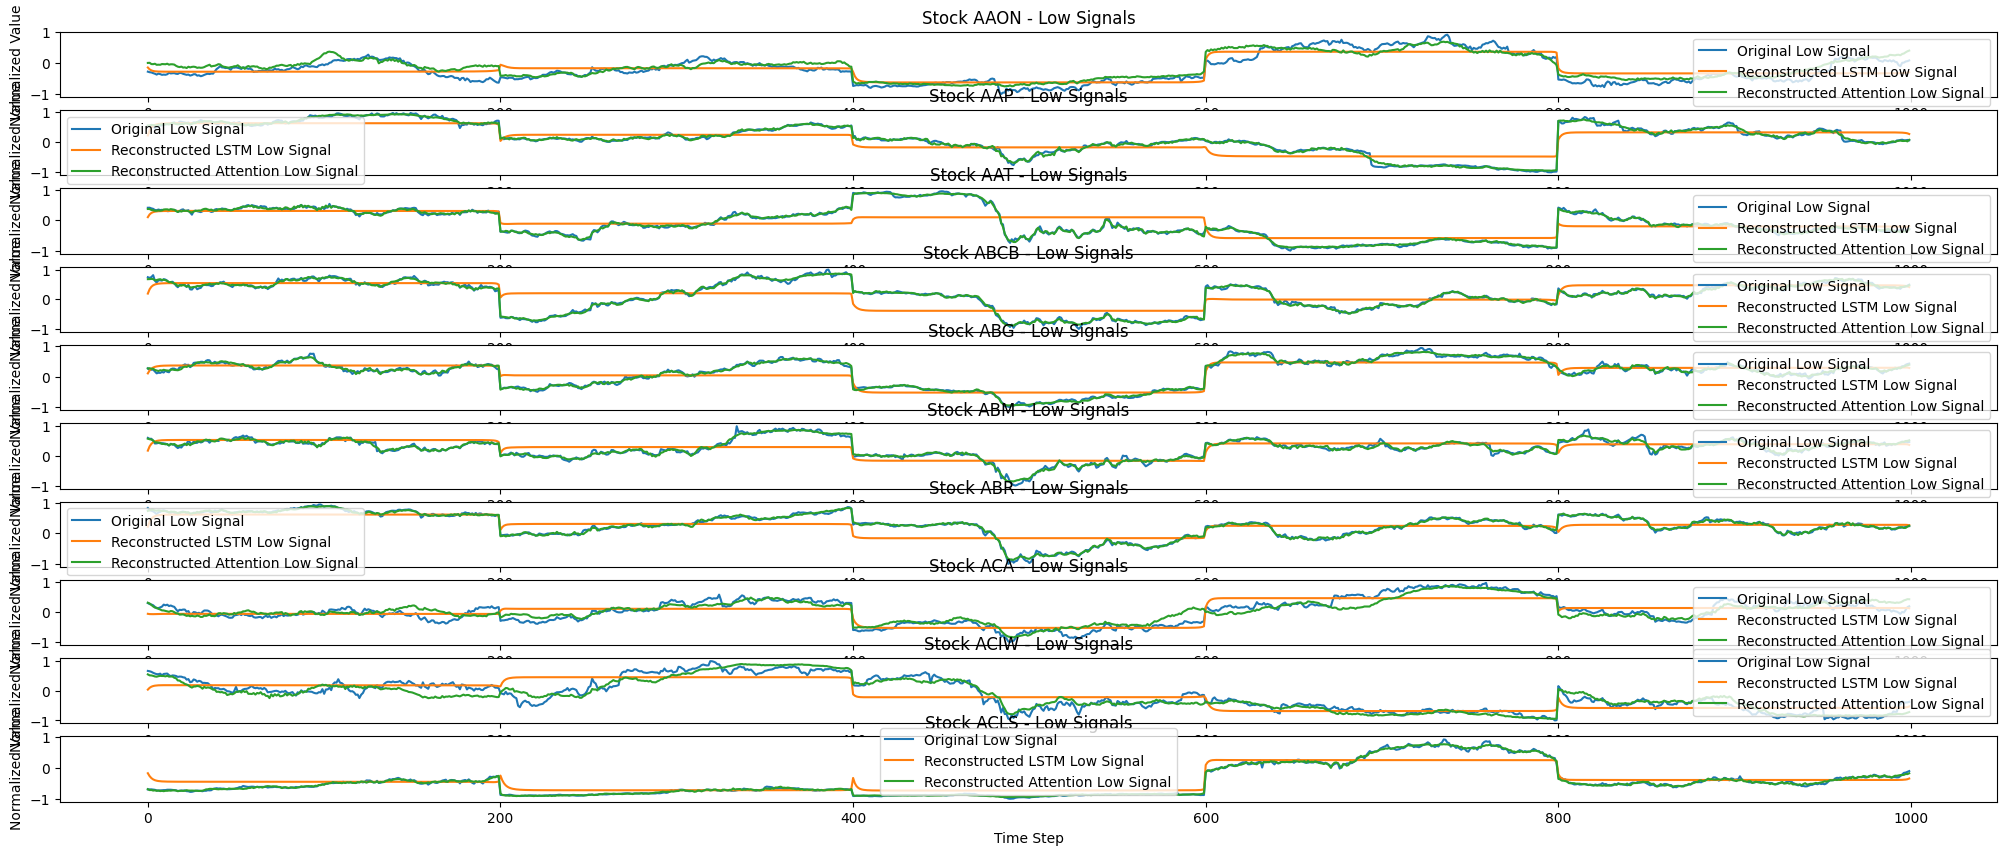

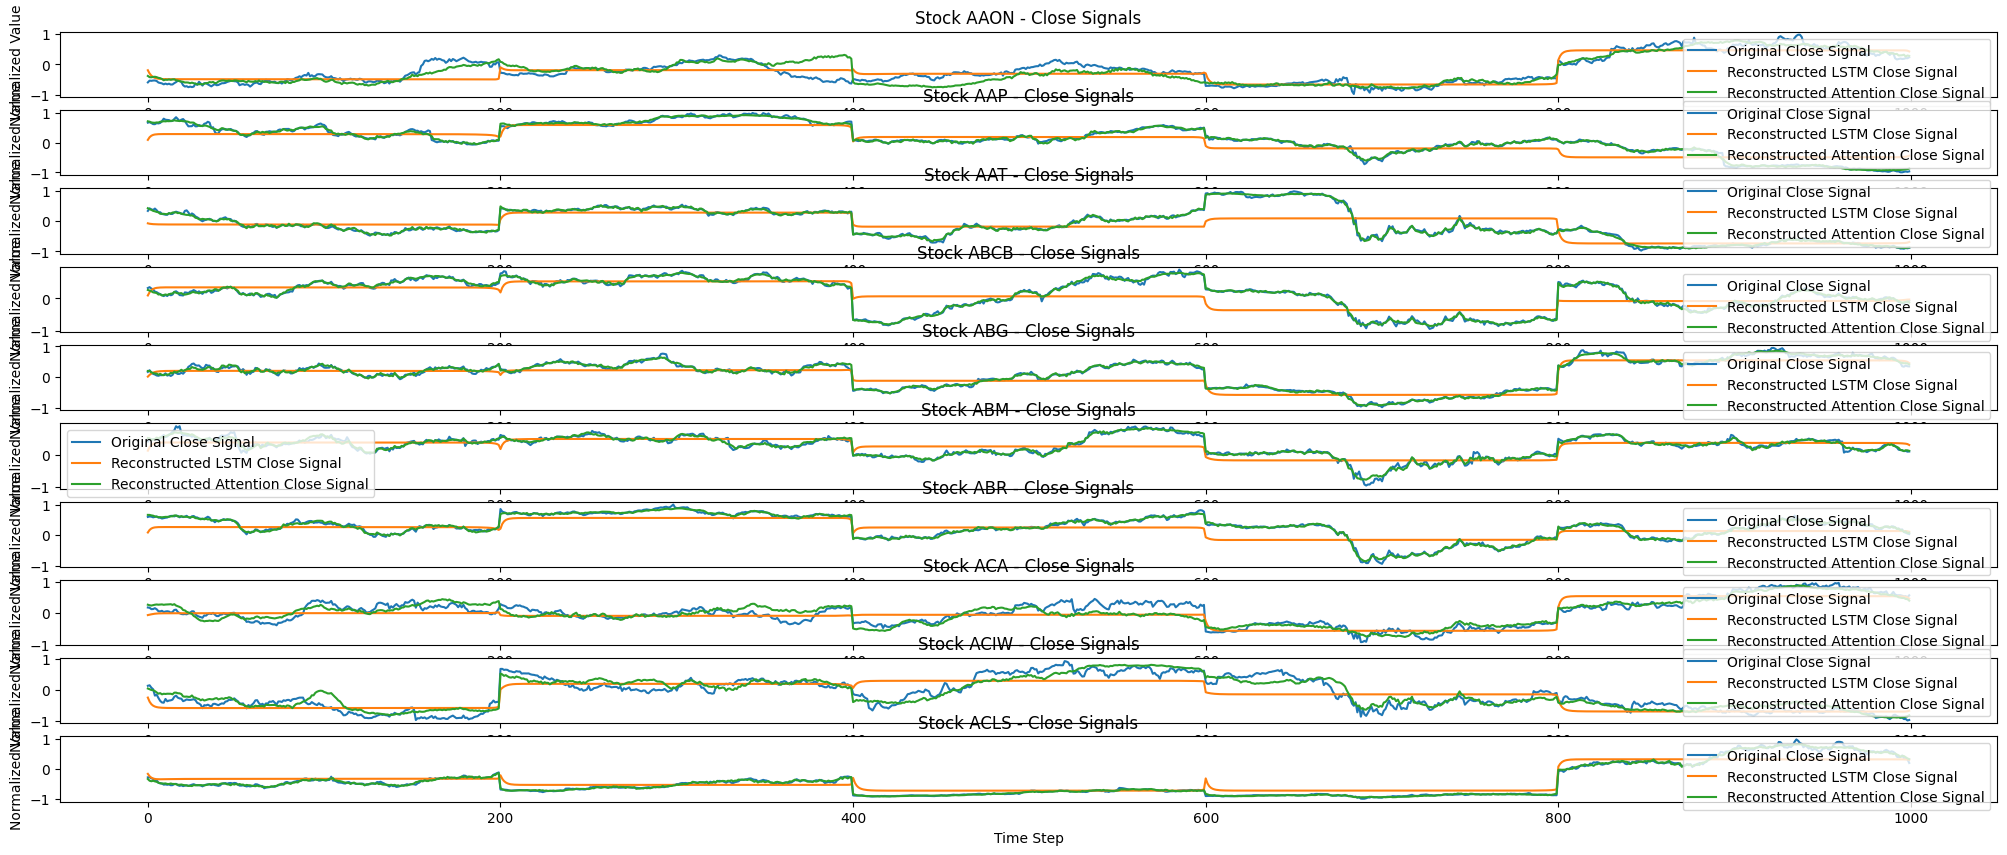

In [106]:
import matplotlib.pyplot as plt

with torch.no_grad():
    x, original_x, mu, sigma = model_attention(signal_to_tensor)
    x_attention = x.cpu().detach().numpy()
    x, original_x, mu, sigma = model_LSTM(signal_to_tensor)
    x_LSTM = x.cpu().detach().numpy()
print(f"x shape : {x.shape}")
# Plot the reconstruction of all signals
stocks_kept= [stock[1] for stock in kept_stocks_with_indexes]
stocks_to_plot = 10
# Reshape the data
print(f"number_of_stocks : {number_of_stocks}")
print(f"number_of_sub_series : {number_of_sub_series}")
print(f"sub_series_length : {sub_series_length}")
stocks_np_array_reshaped = stocks_np_array.reshape((number_of_stocks, number_of_sub_series, sub_series_length,4))
reconstructed_signals_reshaped_attention = x_attention.reshape((number_of_stocks, number_of_sub_series, sub_series_length, 4))
reconstructed_signals_reshaped_LSTM = x_LSTM.reshape((number_of_stocks, number_of_sub_series, sub_series_length, 4))

print(f"stocks_np_array_reshaped shape : {stocks_np_array_reshaped.shape}")
# Plot each characteristic in separate subplots for each stock
# Plot original + LSTM + attention for each characteristic in separate plots
plt.figure(figsize=(15, 10))

characteristics = ['Open', 'High', 'Low', 'Close']  # List of characteristics

for j, characteristic in enumerate(characteristics):
    plt.figure(figsize=(25, 10))
    for i in range(stocks_to_plot):
        plt.subplot(stocks_to_plot, 1, i + 1)
        plt.plot(stocks_np_array_reshaped[i, :, :, j].reshape((-1, 1)), label=f'Original {characteristic} Signal')
        plt.plot(reconstructed_signals_reshaped_LSTM[i, :, :, j].reshape((-1, 1)), label=f'Reconstructed LSTM {characteristic} Signal')
        plt.plot(reconstructed_signals_reshaped_attention[i, :, :, j].reshape((-1, 1)), label=f'Reconstructed Attention {characteristic} Signal')

        plt.title(f'Stock {stocks_kept[i]} - {characteristic} Signals')
        plt.xlabel('Time Step')
        plt.ylabel('Normalized Value')
        plt.legend()

    plt.show()



signals_latent shape : (1130, 128)
226
shape (226, 128)
generated_signals shape : torch.Size([226, 200, 4])
Shape of generated_signals: torch.Size([226, 800])
Shape of original_signals_latent: (1130, 800)
combined_latent_tsne shape (1356, 2)
1356
number of signals : (1356, 2)


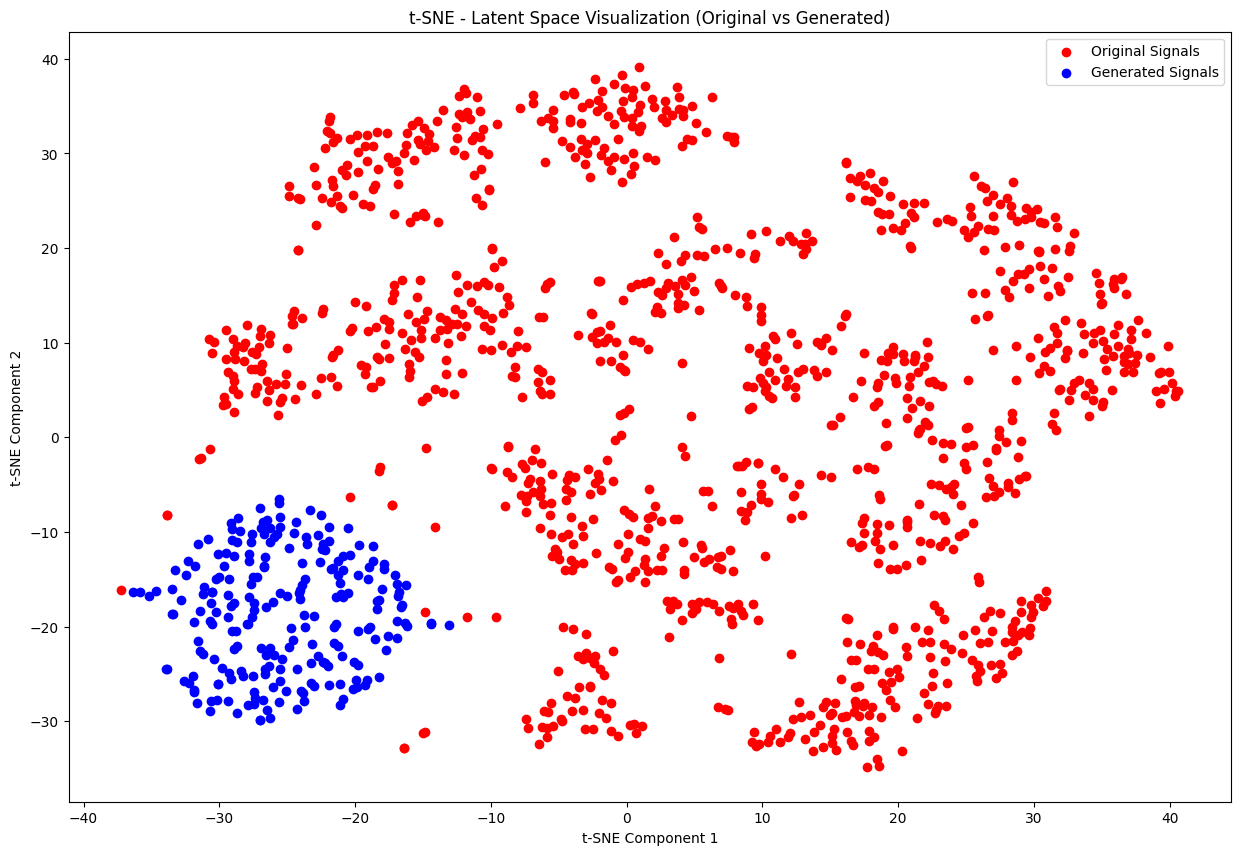

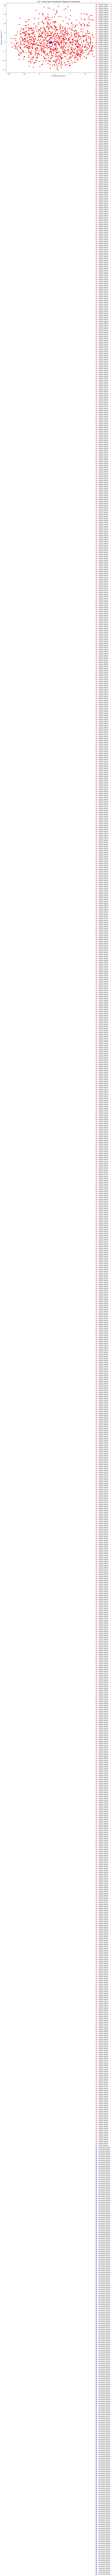

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


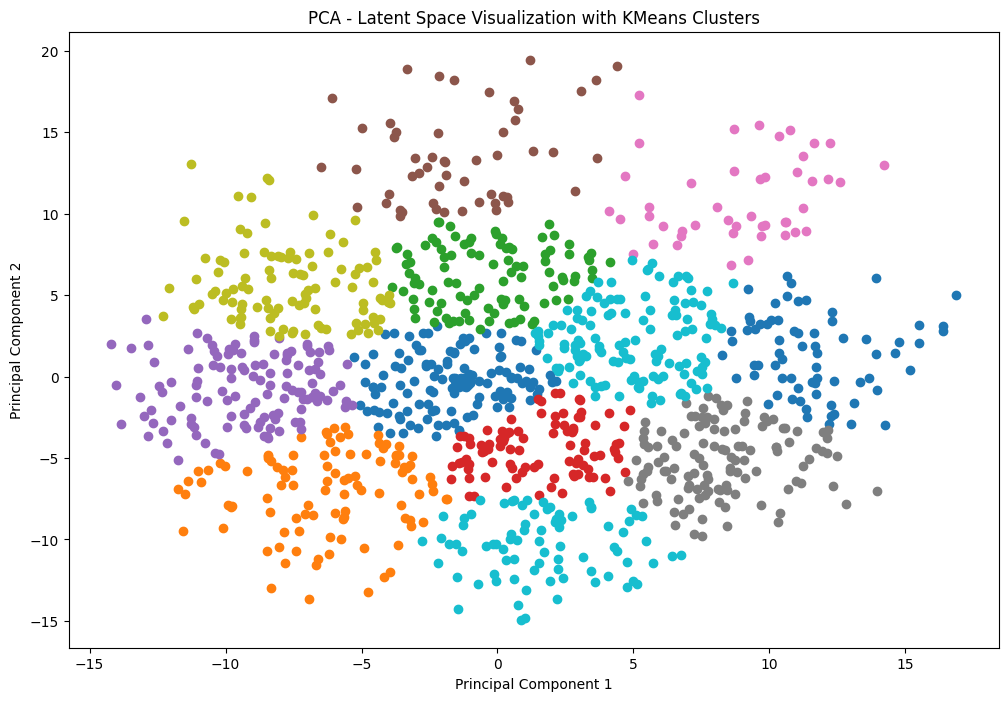

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


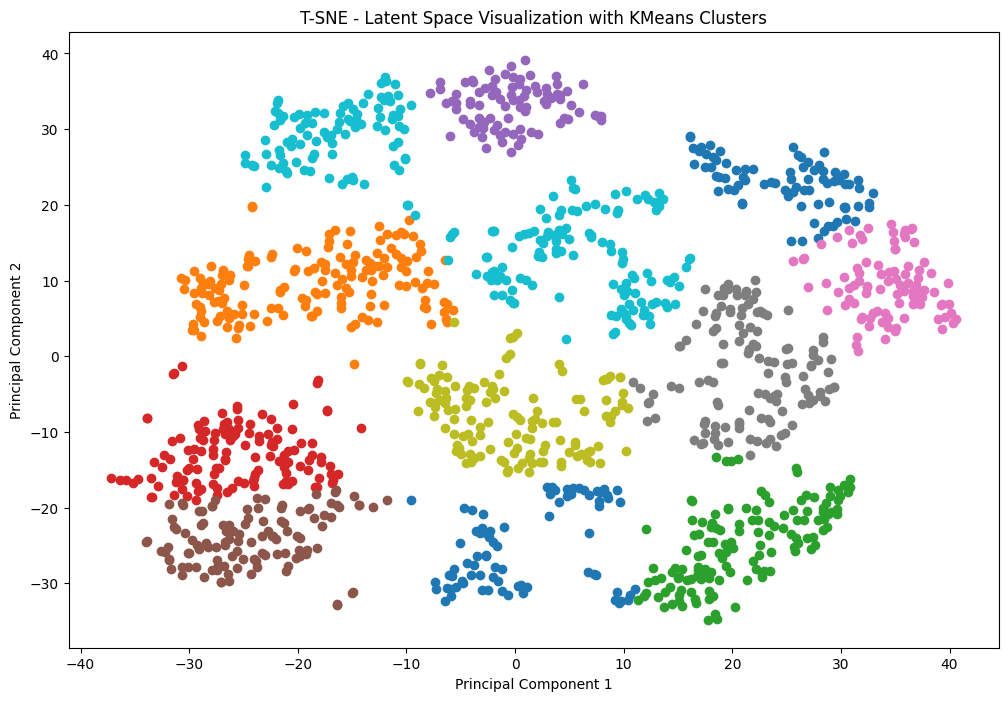

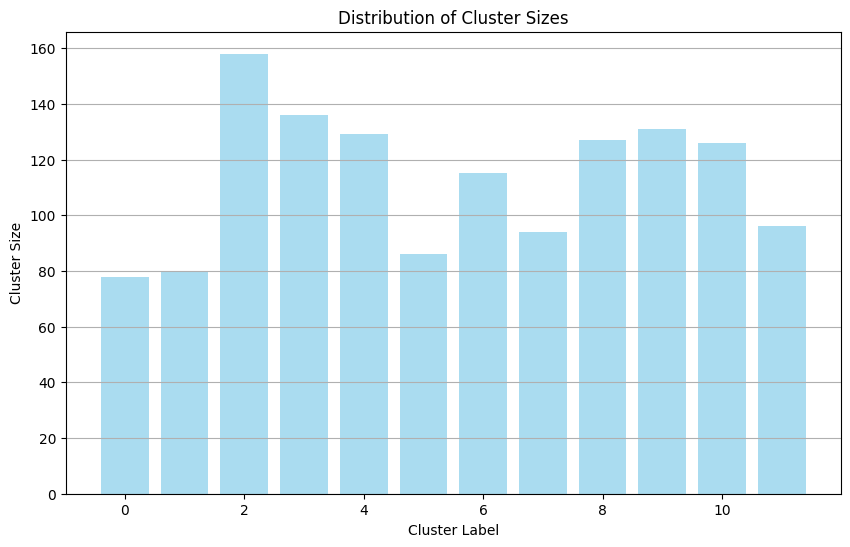

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import torch
import numpy as np
latent_dim = 10
# Assuming you have defined variables like model_attention, signal_to_tensor, number_of_stocks, number_of_sub_series, latent_dim, stock_symbols

with torch.no_grad():
    signals_latent, _, _, _ = model_attention.encoder(signal_to_tensor)
    signals_latent = signals_latent.squeeze().cpu().detach().numpy()

print(f"signals_latent shape : {signals_latent.shape}")
original_signals_latent = signals_latent

# Reshaping signals_latent
#signals_latent = signals_latent.reshape((number_of_stocks, number_of_sub_series, latent_dim))
print(number_of_stocks)

# Define the number of new signals to create and the number of points to interpolate
num_new_signals = number_of_stocks
number_of_points = 1

# Generate 150 unique combinations of interpolated signals
generated_signals = []
for _ in range(num_new_signals):
    # Select two distinct indices for signals to interpolate
    signal_1_index, signal_2_index = np.random.choice(number_of_stocks, size=2, replace=False)
    signal_1 = signals_latent[signal_1_index]
    signal_2 = signals_latent[signal_2_index]

    # Interpolate between the two signals based on shuffled indices
    new_signal = np.linspace(signal_1, signal_2, num=number_of_points+2)[1:-1]  # Generate intermediate points
    generated_signals.append(new_signal)

# Convert the list of generated signals into a numpy array
generated_signals = np.array(generated_signals)

generated_signals = generated_signals.squeeze(1)

print(f"shape {generated_signals.shape}")
with torch.no_grad():
    generated_signals = torch.from_numpy(generated_signals).float().to(device)
    generated_signals = model_attention.decoder(generated_signals)
    print(f"generated_signals shape : {generated_signals.shape}")
# flatten temporal dimension
generated_signals = generated_signals.reshape((generated_signals.shape[0],generated_signals.shape[1]*generated_signals.shape[2]))
original_signals_latent = signal_to_tensor.cpu().detach().numpy()
# flatten also for original signals
original_signals_latent = original_signals_latent.reshape((original_signals_latent.shape[0],original_signals_latent.shape[1]*original_signals_latent.shape[2]))
# Display the shapes of signals
print(f"Shape of generated_signals: {generated_signals.shape}")
print(f"Shape of original_signals_latent: {original_signals_latent.shape}")
# decode the generated signals
with torch.no_grad():
    pass
# Perform t-SNE on the concatenated data (original and generated signals)
combined_latent_space = np.concatenate((original_signals_latent, generated_signals), axis=0)
combined_labels = np.array([0] * signals_latent.shape[0] + [1] * (generated_signals.shape[0]))

# t-SNE on combined latent space
tsne_combined = TSNE(n_components=2)
combined_latent_tsne = tsne_combined.fit_transform(combined_latent_space)
print(f"combined_latent_tsne shape {combined_latent_tsne.shape}")
print(len(combined_labels))
# Plotting original and generated signals in different colors using t-SNE
plt.figure(figsize=(15, 10))
print(f"number of signals : {combined_latent_tsne.shape}")
counter_r = 0
counter_b = 0
for i in range((combined_latent_tsne.shape[0])):
    if combined_labels[i] == 0:
        plt.scatter(combined_latent_tsne[i, 0], combined_latent_tsne[i, 1], color='red', label='Original Signals' if counter_r == 0 else None)
        counter_r += 1

    else:
        plt.scatter(combined_latent_tsne[i, 0], combined_latent_tsne[i, 1], color='blue', label='Generated Signals' if counter_b == 0 else None)
        counter_b += 1

plt.title('t-SNE - Latent Space Visualization (Original vs Generated)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# Perform PCA on the concatenated data (original and generated signals)
pca_combined = PCA(n_components=2)
combined_latent_pca = pca_combined.fit_transform(combined_latent_space)

# Plotting original and generated signals in different colors using PCA
plt.figure(figsize=(15, 10))

for i in range((combined_latent_pca.shape[0])):
    if combined_labels[i] == 0:
        plt.scatter(combined_latent_pca[i, 0], combined_latent_pca[i, 1], color='red', label='Original Signals')
    else:
        plt.scatter(combined_latent_pca[i, 0], combined_latent_pca[i, 1], color='blue', label='Generated Signals')

plt.title('PCA - Latent Space Visualization (Original vs Generated)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Apply KMeans clustering on the combined latent space
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(combined_latent_pca)
num_clusters = len(np.unique(kmeans.labels_))

# Create a colormap with a distinct color for each cluster
colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))

# Plotting clusters
plt.figure(figsize=(12, 8))
for cluster_label, color in zip(range(num_clusters), colors):
    cluster_points = combined_latent_pca[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('PCA - Latent Space Visualization with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply KMeans clustering on the combined latent space
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(combined_latent_tsne)

# Create a colormap with a distinct color for each cluster
colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))

# Plotting clusters
plt.figure(figsize=(12, 8))
for cluster_label, color in zip(range(num_clusters), colors):
    cluster_points = combined_latent_tsne[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('T-SNE - Latent Space Visualization with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

cluster_labels, cluster_counts = np.unique(kmeans.labels_, return_counts=True)

# Plotting the distribution of cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts, color='skyblue', alpha=0.7)
plt.title('Distribution of Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Cluster Size')
plt.grid(axis='y')
plt.show()

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import torch
import numpy as np
latent_dim = 10
# Assuming you have defined variables like model_attention, signal_to_tensor, number_of_stocks, number_of_sub_series, latent_dim, stock_symbols

with torch.no_grad():
    signals_latent, _, _, _ = model_LSTM.encoder(signal_to_tensor)
    signals_latent = signals_latent.squeeze().cpu().detach().numpy()

print(f"signals_latent shape : {signals_latent.shape}")
original_signals_latent = signals_latent

# Reshaping signals_latent
#signals_latent = signals_latent.reshape((number_of_stocks, number_of_sub_series, latent_dim))
print(number_of_stocks)

# Define the number of new signals to create and the number of points to interpolate
num_new_signals = 0
number_of_points = 0

# Generate 150 unique combinations of interpolated signals
generated_signals = []
for _ in range(num_new_signals):
    # Select two distinct indices for signals to interpolate
    signal_1_index, signal_2_index = np.random.choice(number_of_stocks, size=2, replace=False)
    signal_1 = signals_latent[signal_1_index]
    signal_2 = signals_latent[signal_2_index]

    # Interpolate between the two signals based on shuffled indices
    new_signal = np.linspace(signal_1, signal_2, num=number_of_points+2)[1:-1]  # Generate intermediate points
    generated_signals.append(new_signal)

# Convert the list of generated signals into a numpy array
generated_signals = np.array(generated_signals)
#generated_signals = generated_signals.squeeze(1)
print(f"shape {generated_signals.shape}")
generated_signals = generated_signals.reshape(num_new_signals, latent_dim)

# Display the shapes of signals
print(f"Shape of generated_signals: {generated_signals.shape}")

# Perform t-SNE on the concatenated data (original and generated signals)
combined_latent_space = np.concatenate((original_signals_latent, generated_signals), axis=0)
combined_labels = np.array([0] * signals_latent.shape[0] + [1] * (generated_signals.shape[0]))

# t-SNE on combined latent space
tsne_combined = TSNE(n_components=2)
combined_latent_tsne = tsne_combined.fit_transform(combined_latent_space)
print(f"combined_latent_tsne shape {combined_latent_tsne.shape}")
print(len(combined_labels))
# Plotting original and generated signals in different colors using t-SNE
plt.figure(figsize=(12, 8))
print(f"number of signals : {combined_latent_tsne.shape}")
counter = 0
for i in range((combined_latent_tsne.shape[0])):
    if combined_labels[i] == 0:
        plt.scatter(combined_latent_tsne[i, 0], combined_latent_tsne[i, 1], color='red', label='Original Signals' if i == 0 else "")

    #else:
        #plt.scatter(combined_latent_tsne[i, 0], combined_latent_tsne[i, 1], color='blue', label='Generated Signals' if i == number_of_stocks else "")

print(f"counter {counter}")
plt.title('t-SNE - Latent Space Visualization (Original vs Generated)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# Perform PCA on the concatenated data (original and generated signals)
pca_combined = PCA(n_components=2)
combined_latent_pca = pca_combined.fit_transform(combined_latent_space)

# Plotting original and generated signals in different colors using PCA
plt.figure(figsize=(12, 8))

for i in range((combined_latent_pca.shape[0])):
    if combined_labels[i] == 0:
        plt.scatter(combined_latent_pca[i, 0], combined_latent_pca[i, 1], color='red', label='Original Signals' if i == 0 else "")
    else:
        plt.scatter(combined_latent_pca[i, 0], combined_latent_pca[i, 1], color='blue', label='Generated Signals' if i == number_of_stocks else "")

plt.title('PCA - Latent Space Visualization (Original vs Generated)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Apply KMeans clustering on the combined latent space
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(combined_latent_pca)
num_clusters = len(np.unique(kmeans.labels_))

# Create a colormap with a distinct color for each cluster
colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))

# Plotting clusters
plt.figure(figsize=(12, 8))
for cluster_label, color in zip(range(num_clusters), colors):
    cluster_points = combined_latent_pca[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('PCA - Latent Space Visualization with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply KMeans clustering on the combined latent space
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(combined_latent_tsne)
num_clusters = len(np.unique(kmeans.labels_))

# Create a colormap with a distinct color for each cluster
colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))

# Plotting clusters
plt.figure(figsize=(12, 8))
for cluster_label, color in zip(range(num_clusters), colors):
    cluster_points = combined_latent_tsne[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('T-SNE - Latent Space Visualization with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
cluster_labels, cluster_counts = np.unique(kmeans.labels_, return_counts=True)

# Plotting the distribution of cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts, color='skyblue', alpha=0.7)
plt.title('Distribution of Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Cluster Size')
plt.grid(axis='y')
plt.show()


signals_latent shape : (2825, 10)
565
shape (0,)
Shape of generated_signals: (0, 64)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 10 and the array at index 1 has size 64

In [ ]:
cluster_to_plot = 3
# Plot the signals in the cluster
plt.figure(figsize=(20, 5))
for i, cluster in enumerate(kmeans.labels_):
    if cluster == cluster_to_plot:
        plt.plot(signal_to_tensor[i,:,0].cpu())
plt.title(f'Stocks in Cluster {cluster_to_plot}')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

IndexError: index 2846 is out of bounds for dimension 0 with size 2825

latent_signal_np_array shape : (575, 64)
number_of_points : 5
signal_1 shape : (5, 64)
signal_2 shape : (5, 64)


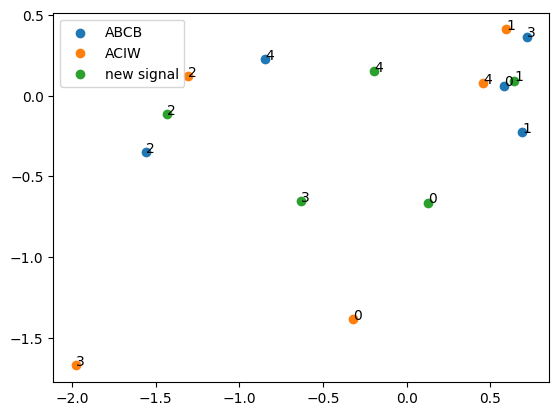

In [63]:
# interpolate between two signales
# take the first signal
print(f"latent_signal_np_array shape : {signals_latent.shape}")
signals_latent = signals_latent.reshape((number_of_stocks, number_of_sub_series, latent_dim))

signal_1_index,signal_1_name = 3, stock_symbols[3]

signal_2_index ,signal_2_name = 8, stock_symbols[8]
signal_1 = signals_latent[signal_1_index]
signal_2 = signals_latent[signal_2_index]

# define the number of points to interpolate
number_of_points = signal_1.shape[0]
print(f"number_of_points : {number_of_points}")
print(f"signal_1 shape : {signal_1.shape}")
print(f"signal_2 shape : {signal_2.shape}")
new_signal = np.zeros((number_of_points,latent_dim))

for i in range(number_of_points):


    new_signal[i] = (signal_1[i] + (signal_2[i]) ) / 2

# apply PCA to the new signal
#pca = PCA(n_components=2)
#
# plot the latent space with the 3 signals in different colors
#latent_space_new_signal = pca.fit_transform(new_signal)
latent_space_new_signal = new_signal
plt.scatter(signal_1[:,0],signal_1[:,1],label=signal_1_name)
plt.scatter(signal_2[:,0],signal_2[:,1],label=signal_2_name)
plt.scatter(latent_space_new_signal[:,0],latent_space_new_signal[:,1],label='new signal')
for i in range(number_of_points):
    plt.annotate(str(i), (signal_1[i, 0], signal_1[i, 1]))
    plt.annotate(str(i), (signal_2[i, 0], signal_2[i, 1]))
    plt.annotate(str(i), (latent_space_new_signal[i, 0], latent_space_new_signal[i, 1]))
plt.legend()
plt.show()

new signal shape : torch.Size([5, 64])
new signal decoded shape : (5, 200, 4)
stocks_array_flatten shape : (115, 1000, 4)


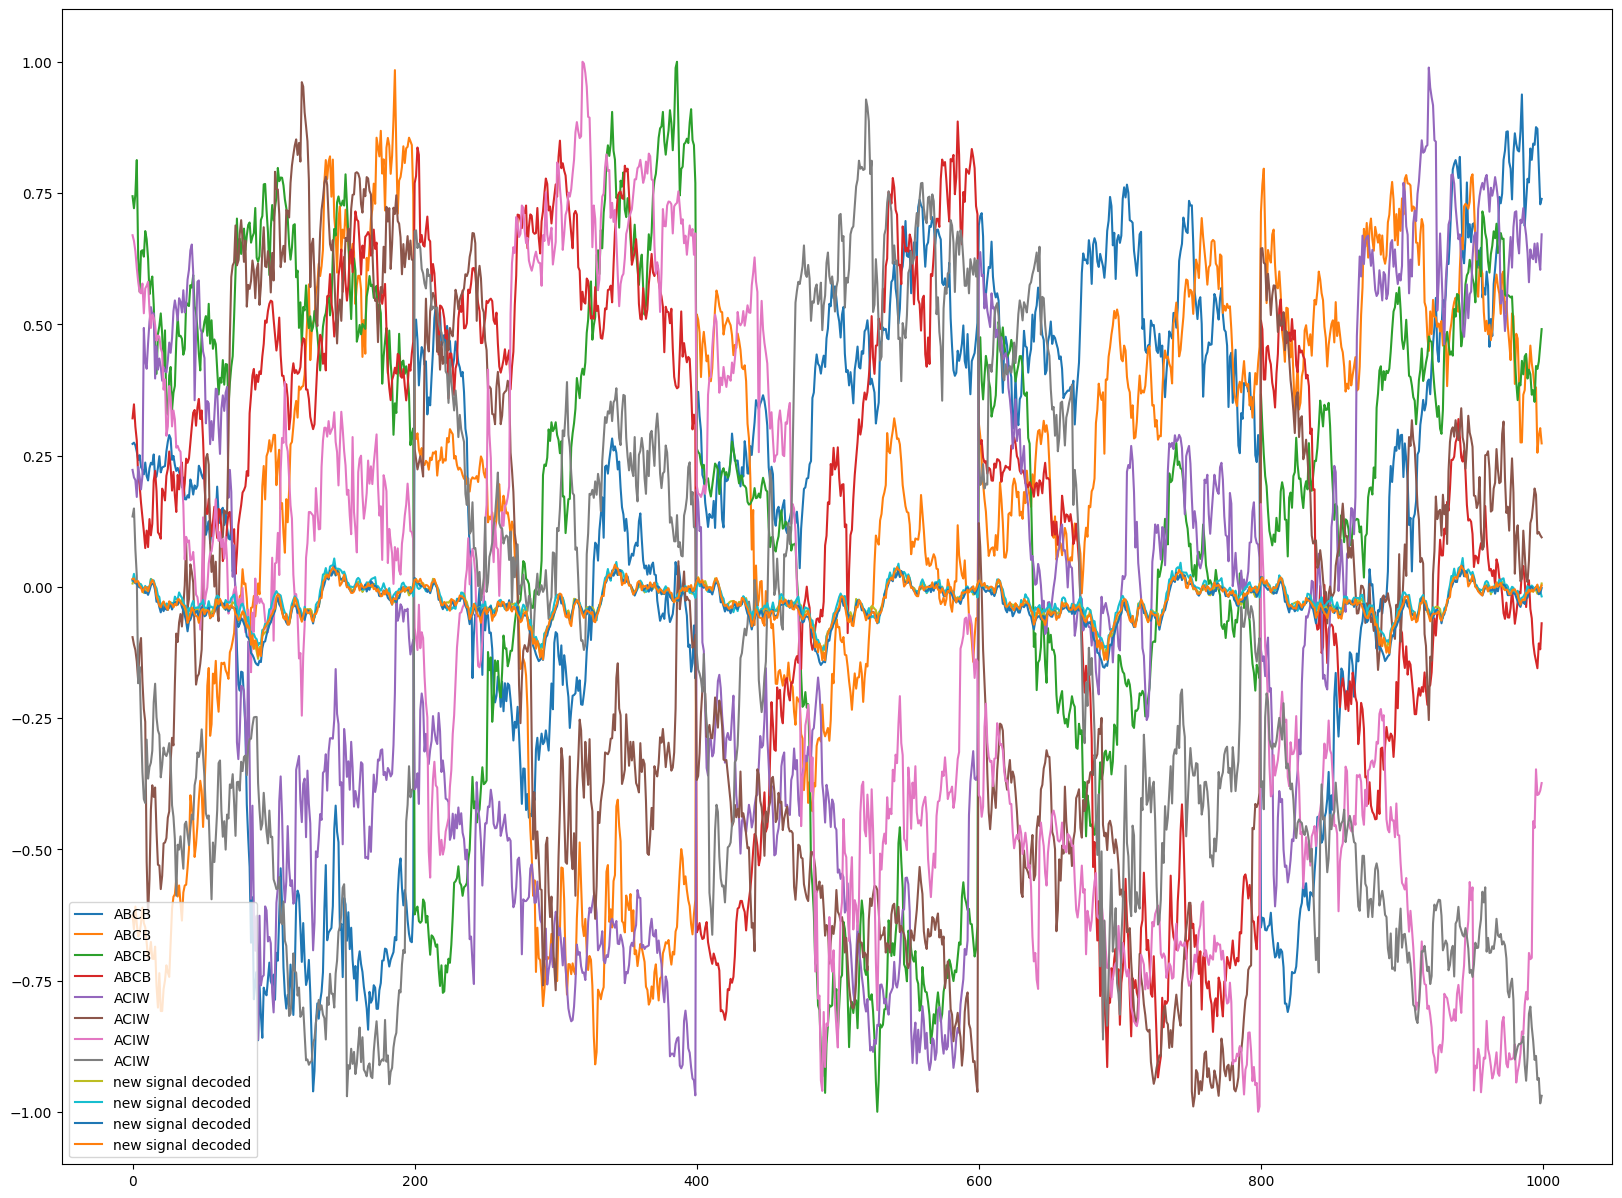

In [64]:
# decode the new signal
new_signal = torch.from_numpy(new_signal).float().to(device)
new_signal = new_signal.squeeze()
print(f"new signal shape : {new_signal.shape}")
with torch.no_grad():
    new_signal_decoded = model_attention.decoder(new_signal)
    new_signal_decoded = nn.Tanh()(new_signal_decoded)
    new_signal_decoded = new_signal_decoded.squeeze().cpu().detach().numpy()
print(f"new signal decoded shape : {new_signal_decoded.shape}")
new_signal_decoded = new_signal_decoded.reshape((number_of_sub_series*sub_series_length,4))

stocks_array_flatten = stocks_np_array.reshape((number_of_stocks,number_of_sub_series*sub_series_length,4))
print(f"stocks_array_flatten shape : {stocks_array_flatten.shape}")
# plot the new signal decoded, the first signal and the second signal
plt.figure(figsize=(20, 15))
plt.plot(stocks_array_flatten[signal_1_index],label=signal_1_name)
plt.plot(stocks_array_flatten[signal_2_index],label=signal_2_name)
plt.plot(new_signal_decoded,label='new signal decoded')
plt.legend()
plt.show()


In [65]:
import numpy as np

# Supposons que signals_latent, number_of_stocks, number_of_sub_series, latent_dim, signal_symbols sont définis

# Réorganiser signals_latent
signals_latent = signals_latent.reshape((number_of_stocks, number_of_sub_series, latent_dim))

signal_1_index, signal_1_name = 3, stock_symbols[3]
signal_2_index, signal_2_name = 8, stock_symbols[8]

signal_1 = signals_latent[signal_1_index]
signal_2 = signals_latent[signal_2_index]

# Définir le nombre de points à interpoler
number_of_points = 5

# Créer un tableau de points entre signal_1 et signal_2
interpolated_signals = np.linspace(signal_1, signal_2, num=number_of_points+2)[1:-1]  # Générer les points intermédiaires
# Afficher les formes des signaux
print(f"Forme de signal_1 : {signal_1.shape}")
print(f"Forme de signal_2 : {signal_2.shape}")
print(f"Forme des signaux interpolés : {interpolated_signals.shape}")

# Le tableau interpolated_signals contient les 10 valeurs intermédiaires entre signal_1 et signal_2


Forme de signal_1 : (5, 64)
Forme de signal_2 : (5, 64)
Forme des signaux interpolés : (5, 5, 64)


In [66]:
# decode the new signal
interpolated_signals_tensor = torch.from_numpy(interpolated_signals).float().to(device)
interpolated_signals_tensor = interpolated_signals_tensor.squeeze()
interpolated_signals_tensor = interpolated_signals_tensor.reshape((number_of_points*number_of_sub_series,latent_dim))


In [67]:
with torch.no_grad():
    interpolated_signals_decoded = model_attention.decoder(interpolated_signals_tensor)
    interpolated_signals_decoded = nn.Tanh()(interpolated_signals_decoded)
    interpolated_signals_decoded = interpolated_signals_decoded.squeeze().cpu().detach().numpy()
print(f"interpolated_signals_decoded shape : {interpolated_signals_decoded.shape}")
interpolated_signals_decoded = interpolated_signals_decoded.reshape((number_of_points,number_of_sub_series*sub_series_length,4))
print(f"interpolated_signals_decoded shape : {interpolated_signals_decoded.shape}")

interpolated_signals_decoded shape : (25, 200, 4)
interpolated_signals_decoded shape : (5, 1000, 4)


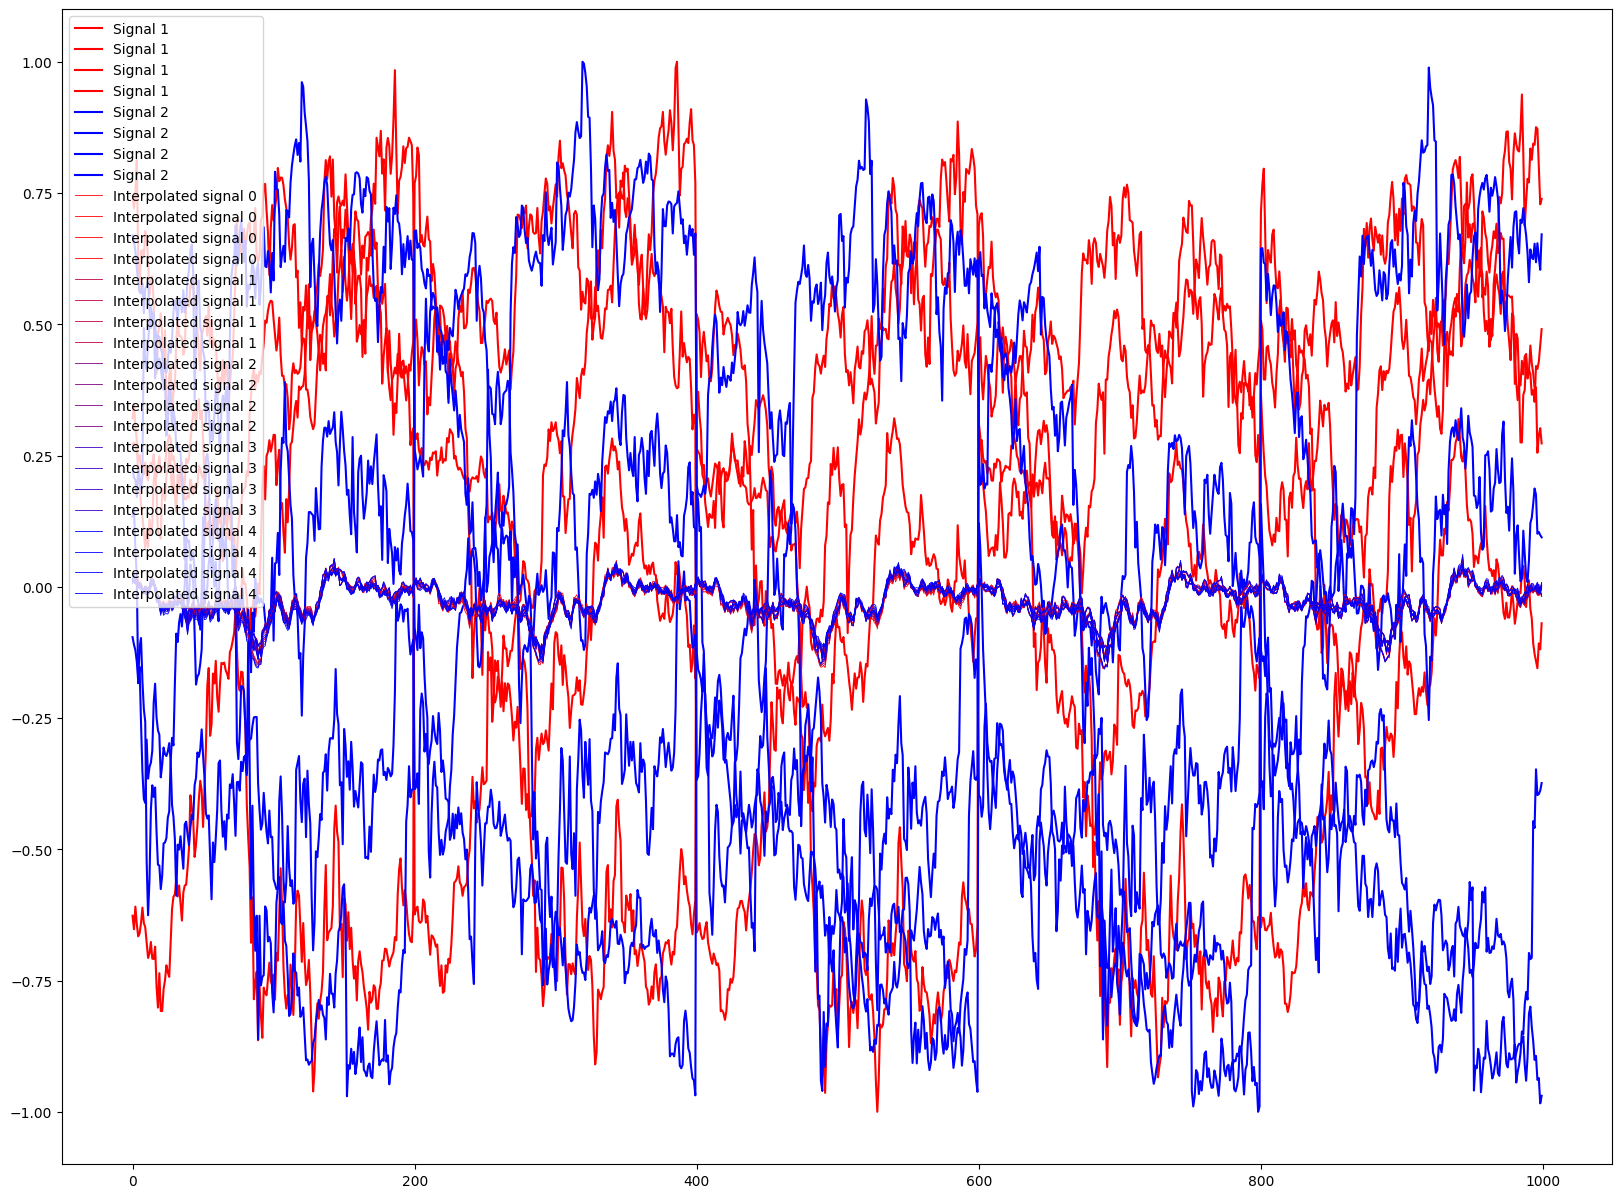

In [68]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming interpolated_signals_decoded is a list/array containing the interpolated signals

# Define the colors for signal 1 and signal 2
color_signal_1 = 'red'    # Replace with the color of signal 1
color_signal_2 = 'blue'   # Replace with the color of signal 2

# Values to map to the colors
min_index = 0
max_index = len(interpolated_signals_decoded) - 1

# Normalize indices between 0 and 1 for colormap
norm = mcolors.Normalize(vmin=min_index, vmax=max_index)

# Colormap using signal 1 and signal 2 colors
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_signal_1, color_signal_2])

plt.figure(figsize=(20, 15))

# Assuming you have signal_1_index and signal_2_index defined for plotting
plt.plot(stocks_array_flatten[signal_1_index], label='Signal 1',color=color_signal_1)
plt.plot(stocks_array_flatten[signal_2_index], label='Signal 2',color=color_signal_2)

number_of_points = len(interpolated_signals_decoded)

for i in range(number_of_points):
    # Get the color based on the normalized index value
    normalized_index = norm(i)
    color = cmap(normalized_index)

    plt.plot(
        interpolated_signals_decoded[i],
        label=f"Interpolated signal {i}",
        color=color,
        linewidth=0.6  # Adjust line thickness as needed
    )

plt.legend()
plt.show()
